In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
logs_df_statistical_method = pd.read_csv("/content/drive/MyDrive/logs_df_statistical_method.csv")
logs_df_statistical_method.head()

,Unnamed: 0,request_processing_time,target_processing_time,response_processing_time,received_bytes,sent_bytes,number of requests
0,0,0.000,0.759,0.0,375,542,1
1,1,0.001,0.194,0.0,374,2363,5
2,2,0.001,0.444,0.0,374,542,7
3,3,0.000,0.221,0.0,375,5641,8
4,4,0.001,0.168,0.0,375,2532,8


In [ ]:
logs_df_statistical_method.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
logs_df_statistical_method.shape

(100000, 6)

# Statistical model

## Histograms of values

### Unidimensional case

In [ ]:
# statistical model unidimensional case
columns_leverage_statistics = list()
for i in range(6):
  columns_leverage_statistics.append(list())
column_index = 0
for column in logs_df_statistical_method.columns:
    starting_index = 0
    for i in tqdm(range(50, logs_df_statistical_method.shape[0])): # window size is 50
        arithmetic_mean = np.mean(logs_df_statistical_method[column][starting_index:i])
        leverage_statistic = 1/50 + (logs_df_statistical_method[column][i-1] - arithmetic_mean) ** 2 / np.sum(np.power(logs_df_statistical_method[column][starting_index:i] - arithmetic_mean, 2))
        columns_leverage_statistics[column_index].append(leverage_statistic)
        starting_index = starting_index + 1
    column_index = column_index + 1

  0%|          | 0/99950 [00:00<?, ?it/s]<ipython-input-108-8305f3027302>:10: RuntimeWarning: invalid value encountered in double_scalars
  leverage_statistic = 1/50 + (logs_df_statistical_method[column][i-1] - arithmetic_mean) ** 2 / np.sum(np.power(logs_df_statistical_method[column][starting_index:i] - arithmetic_mean, 2))
100%|██████████| 99950/99950 [00:48<00:00, 2069.92it/s]


In [ ]:
import seaborn as sns

In [ ]:
first_array = np.array(columns_leverage_statistics[0])[np.isnan(columns_leverage_statistics[0]) == False]
first_array = (first_array[first_array != np.inf])

[Text(0.5, 0, 'request_processing_time values leverage statistics'),
 Text(0, 0.5, 'count (number of values)')]

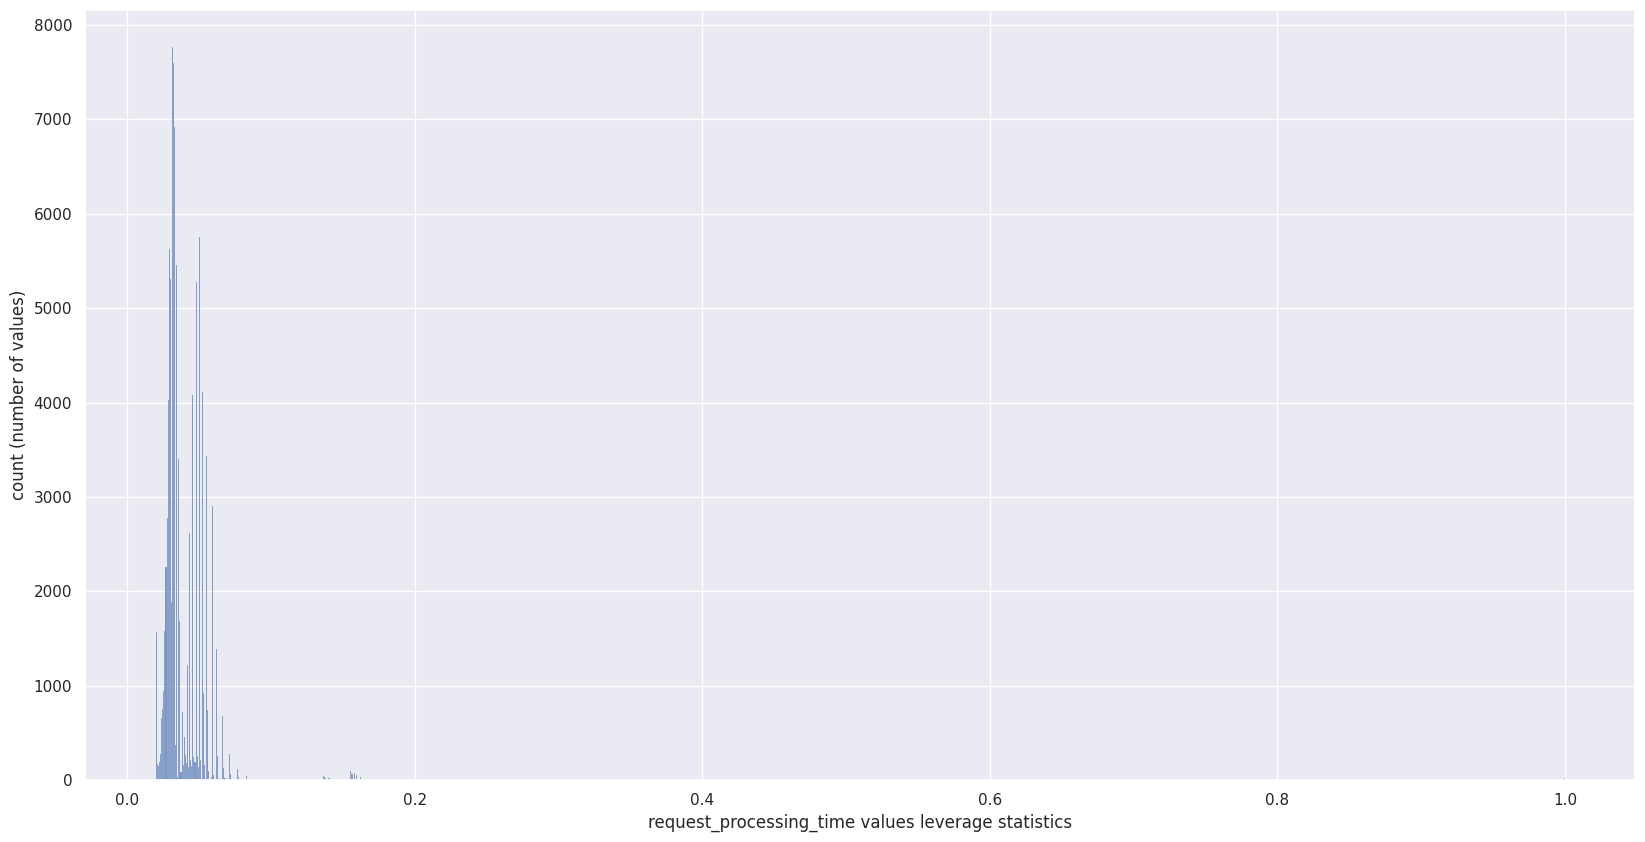

In [ ]:
sns.set(rc={'figure.figsize':(20, 10)})
ax = sns.histplot(first_array, kde=False)
ax.set(xlabel="request_processing_time values leverage statistics", ylabel='count (number of values)')

In [ ]:
first_array[len(first_array) - 10:]

array([0.05555556, 0.05263158, 0.03225806, 0.03225806, 0.03125   ,
       0.03125   , 0.03125   , 0.05263158, 0.05263158, 0.05263158])

In [ ]:
second_array = np.array(columns_leverage_statistics[1])[np.isnan(columns_leverage_statistics[1]) == False]
second_array = second_array[second_array != np.inf]

[Text(0.5, 0, 'target_processing_time values leverage statistics'),
 Text(0, 0.5, 'count (number of values)')]

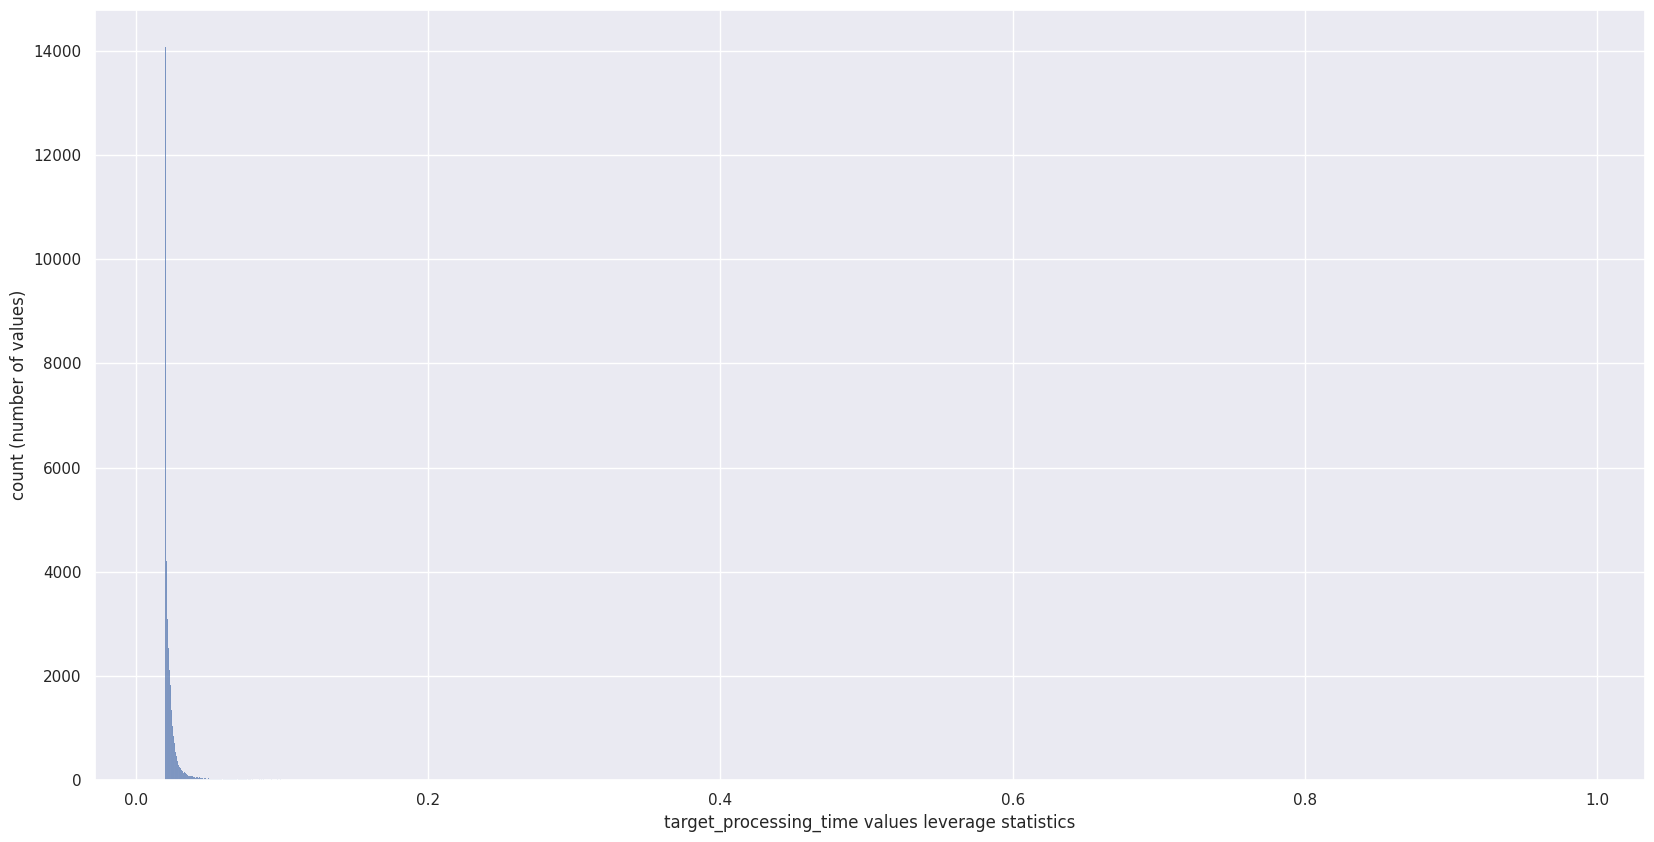

In [ ]:
sns.set(rc={'figure.figsize':(20, 10)})
ax = sns.histplot(second_array, kde=False)
ax.set(xlabel="target_processing_time values leverage statistics", ylabel='count (number of values)')

In [ ]:
second_array[len(second_array) - 10:]

array([0.02081677, 0.02668543, 0.0203462 , 0.0224968 , 0.02080398,
       0.02008593, 0.02856958, 0.02155587, 0.02048112, 0.02286008])

In [ ]:
third_array = np.array(columns_leverage_statistics[2])[np.isnan(columns_leverage_statistics[2]) == False]
third_array = third_array[third_array != np.inf]

[Text(0.5, 0, 'response_processing_time values leverage statistics'),
 Text(0, 0.5, 'count (number of values)')]

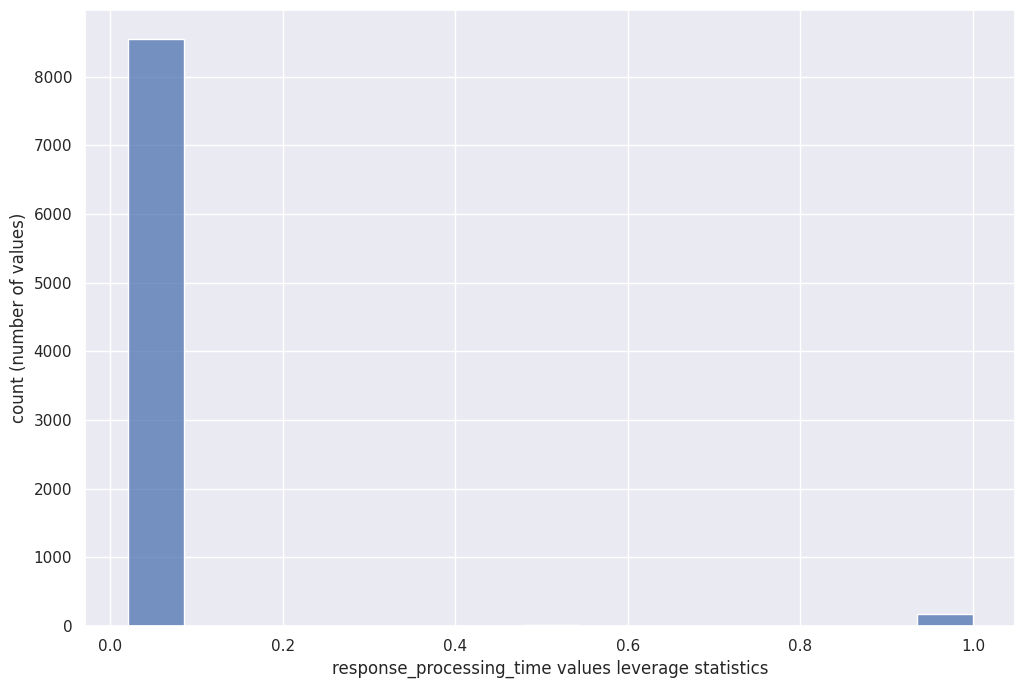

In [ ]:
sns.set(rc={'figure.figsize':(12, 8)})
ax = sns.histplot(third_array, kde=False)
ax.set(xlabel="response_processing_time values leverage statistics", ylabel='count (number of values)')

In [ ]:
third_array[len(third_array) - 10:]

array([0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
       0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816])

In [ ]:
fourth_array = np.array(columns_leverage_statistics[3])[np.isnan(columns_leverage_statistics[3]) == False]
fourth_array = fourth_array[fourth_array != np.inf]

[Text(0.5, 0, 'received_bytes values leverage statistics'),
 Text(0, 0.5, 'count (number of values)')]

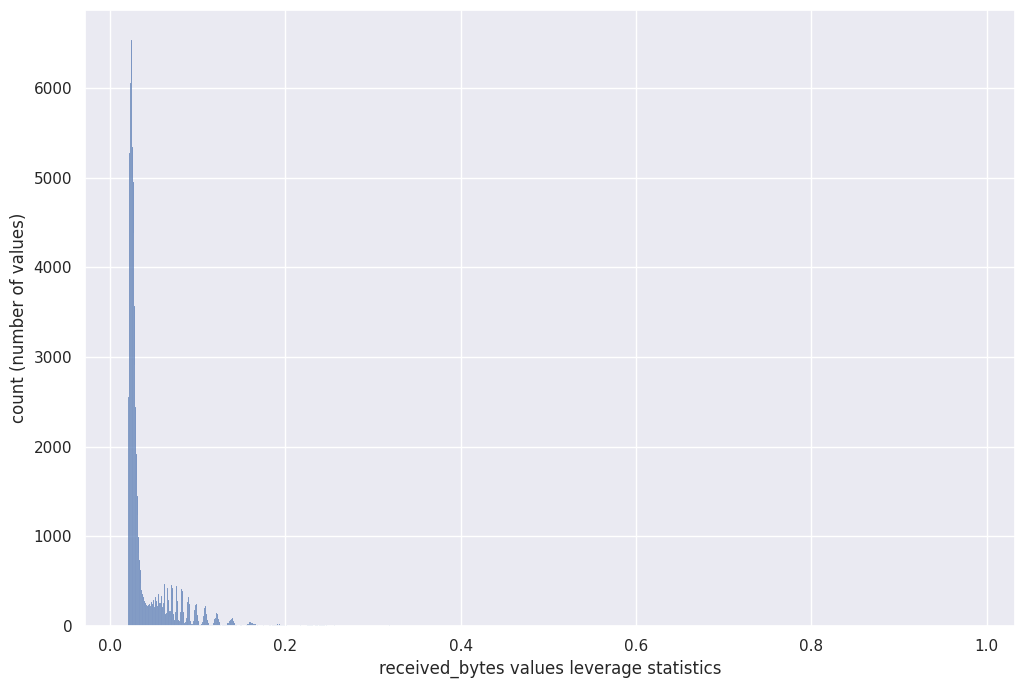

In [ ]:
sns.set(rc={'figure.figsize':(12, 8)})
ax = sns.histplot(fourth_array, kde=False)
ax.set(xlabel="received_bytes values leverage statistics", ylabel='count (number of values)')

In [ ]:
fourth_array[len(fourth_array) - 10:]

array([0.05531689, 0.02982285, 0.0294317 , 0.02982285, 0.028594  ,
       0.0282443 , 0.02899478, 0.03174   , 0.03035274, 0.03099322])

In [ ]:
fifth_array = np.array(columns_leverage_statistics[4])[np.isnan(columns_leverage_statistics[4]) == False]
fifth_array = fifth_array[fifth_array != np.inf]

[Text(0.5, 0, 'sent_bytes values leverage statistics'),
 Text(0, 0.5, 'count (number of values)')]

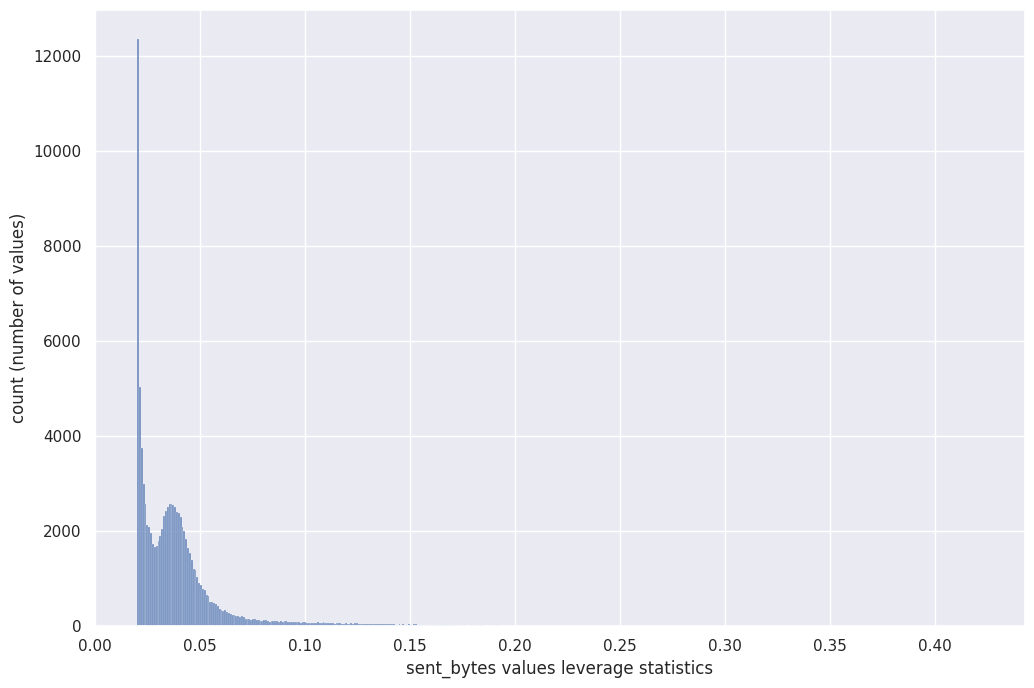

In [ ]:
sns.set(rc={'figure.figsize':(12, 8)})
ax = sns.histplot(fifth_array, kde=False)
ax.set(xlabel="sent_bytes values leverage statistics", ylabel='count (number of values)')

In [ ]:
fifth_array[len(fifth_array) - 10:]

array([0.03240297, 0.02002431, 0.04491155, 0.04680384, 0.0261727 ,
       0.02126191, 0.03671727, 0.07567659, 0.020412  , 0.0497672 ])

In [ ]:
sixth_array = np.array(columns_leverage_statistics[5])[np.isnan(columns_leverage_statistics[5]) == False]
sixth_array = sixth_array[sixth_array != np.inf]

[Text(0.5, 0, 'number of requests values leverage statistics'),
 Text(0, 0.5, 'count (number of values)')]

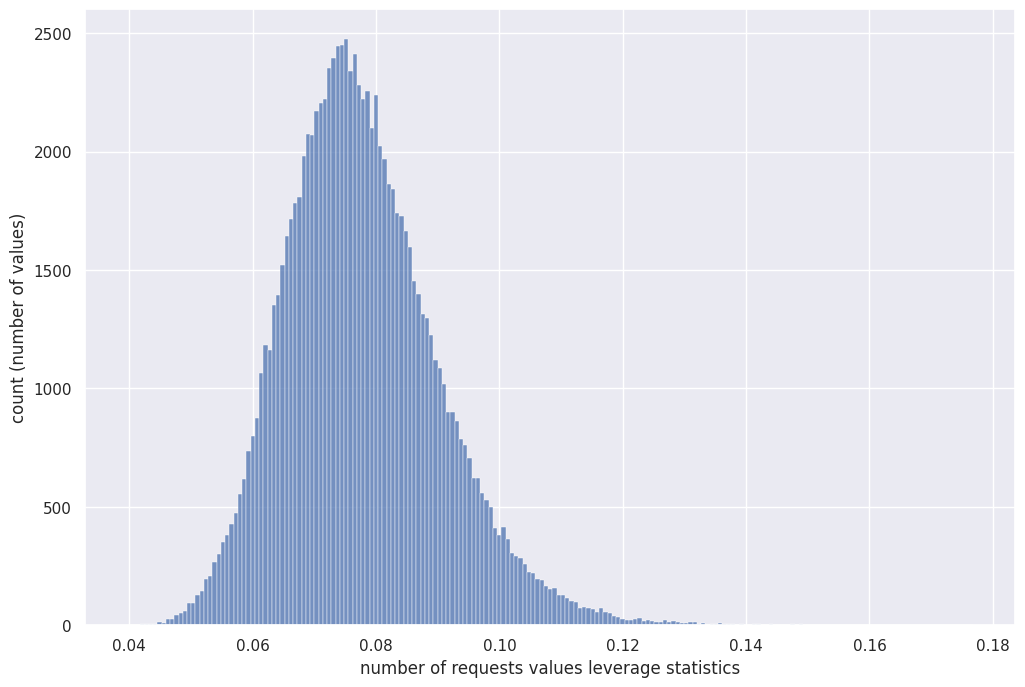

In [ ]:
sns.set(rc={'figure.figsize':(12, 8)})
ax = sns.histplot(sixth_array, kde=False)
ax.set(xlabel="number of requests values leverage statistics", ylabel='count (number of values)')

In [ ]:
sixth_array[len(sixth_array) - 10:]

array([0.05075896, 0.04870509, 0.04686595, 0.04522411, 0.05417402,
       0.05612657, 0.05835429, 0.0566495 , 0.06386293, 0.06188991])

In [ ]:
leverage_statistics_top_10_values_variables = list()
leverage_statistics_top_10_values_variables.extend(list(first_array[len(first_array) - 10:]))
leverage_statistics_top_10_values_variables.extend(list(second_array[len(second_array) - 10:]))
leverage_statistics_top_10_values_variables.extend(list(third_array[len(third_array) - 10:]))
leverage_statistics_top_10_values_variables.extend(list(fourth_array[len(fourth_array) - 10:]))
leverage_statistics_top_10_values_variables.extend(list(fifth_array[len(fifth_array) - 10:]))
leverage_statistics_top_10_values_variables.extend(list(sixth_array[len(sixth_array) - 10:]))
leverage_statistics_top_10_values_variables = set(leverage_statistics_top_10_values_variables)

In [ ]:
leverage_statistics_top_10_values_variables = sorted(leverage_statistics_top_10_values_variables)[len(sorted(leverage_statistics_top_10_values_variables)) - 10:]

In [ ]:
'''# find all observations that have leverage from leverage_statistics_top_10_values_variables
indices_list = list()
column_index = 0
for column in logs_df_statistical_method.columns:
    starting_index = 0
    for i in tqdm(range(50, logs_df_statistical_method.shape[0])): # window size is 50
        arithmetic_mean = np.mean(logs_df_statistical_method[column][starting_index:i])
        leverage_statistic = 1/50 + (logs_df_statistical_method[column][i-1] - arithmetic_mean) ** 2 / np.sum(np.power(logs_df_statistical_method[column][starting_index:i] - arithmetic_mean, 2))
        if leverage_statistic in leverage_statistics_top_10_values_variables:
          indices_list.append(i)
        starting_index = starting_index + 1'''

  0%|          | 0/99950 [00:00<?, ?it/s]<ipython-input-171-907901a055d6>:8: RuntimeWarning: invalid value encountered in double_scalars
  leverage_statistic = 1/50 + (logs_df_statistical_method[column][i-1] - arithmetic_mean) ** 2 / np.sum(np.power(logs_df_statistical_method[column][starting_index:i] - arithmetic_mean, 2))
100%|██████████| 99950/99950 [00:49<00:00, 2005.28it/s]


In [ ]:
sorted_first_array = sorted(first_array)[len(first_array) - 10:]
sorted_first_array

[0.9999884660695812,
 0.9999886267722236,
 0.9999886267722236,
 0.9999886267722236,
 0.9999889125710574,
 0.9999889125710574,
 0.9999892391072609,
 0.9999892391072609,
 0.9999896063759299,
 0.9999896063759299]

In [ ]:
np.argwhere(first_array == sorted_first_array[0])

array([[83112]])

In [ ]:
np.argwhere(first_array == sorted_first_array[1])

array([[22964],
       [40653],
       [40955]])

In [ ]:
np.argwhere(first_array == sorted_first_array[2])
np.argwhere(first_array == sorted_first_array[3])
np.argwhere(first_array == sorted_first_array[4])
np.argwhere(first_array == sorted_first_array[5])
np.argwhere(first_array == sorted_first_array[6])
np.argwhere(first_array == sorted_first_array[7])
np.argwhere(first_array == sorted_first_array[8])
np.argwhere(first_array == sorted_first_array[9])

array([[22964],
       [40653],
       [40955]])

In [ ]:
np.argwhere(first_array == sorted_first_array[3])

array([[22964],
       [40653],
       [40955]])

In [ ]:
np.argwhere(first_array == sorted_first_array[4])

array([[70347],
       [85713]])

In [ ]:
np.argwhere(first_array == sorted_first_array[5])

array([[70347],
       [85713]])

In [ ]:
np.argwhere(first_array == sorted_first_array[6])

array([[13415],
       [33654]])

In [ ]:
np.argwhere(first_array == sorted_first_array[7])

array([[13415],
       [33654]])

In [ ]:
np.argwhere(first_array == sorted_first_array[8])

array([[19276],
       [94919]])

In [ ]:
np.argwhere(first_array == sorted_first_array[9])

array([[19276],
       [94919]])

In [ ]:
first_array.shape

(99950,)

In [ ]:
logs_df_statistical_method.columns

Index(['request_processing_time', 'target_processing_time',
       'response_processing_time', 'received_bytes', 'sent_bytes',
       'number of requests'],
      dtype='object')

Text(0, 0.5, 'values')

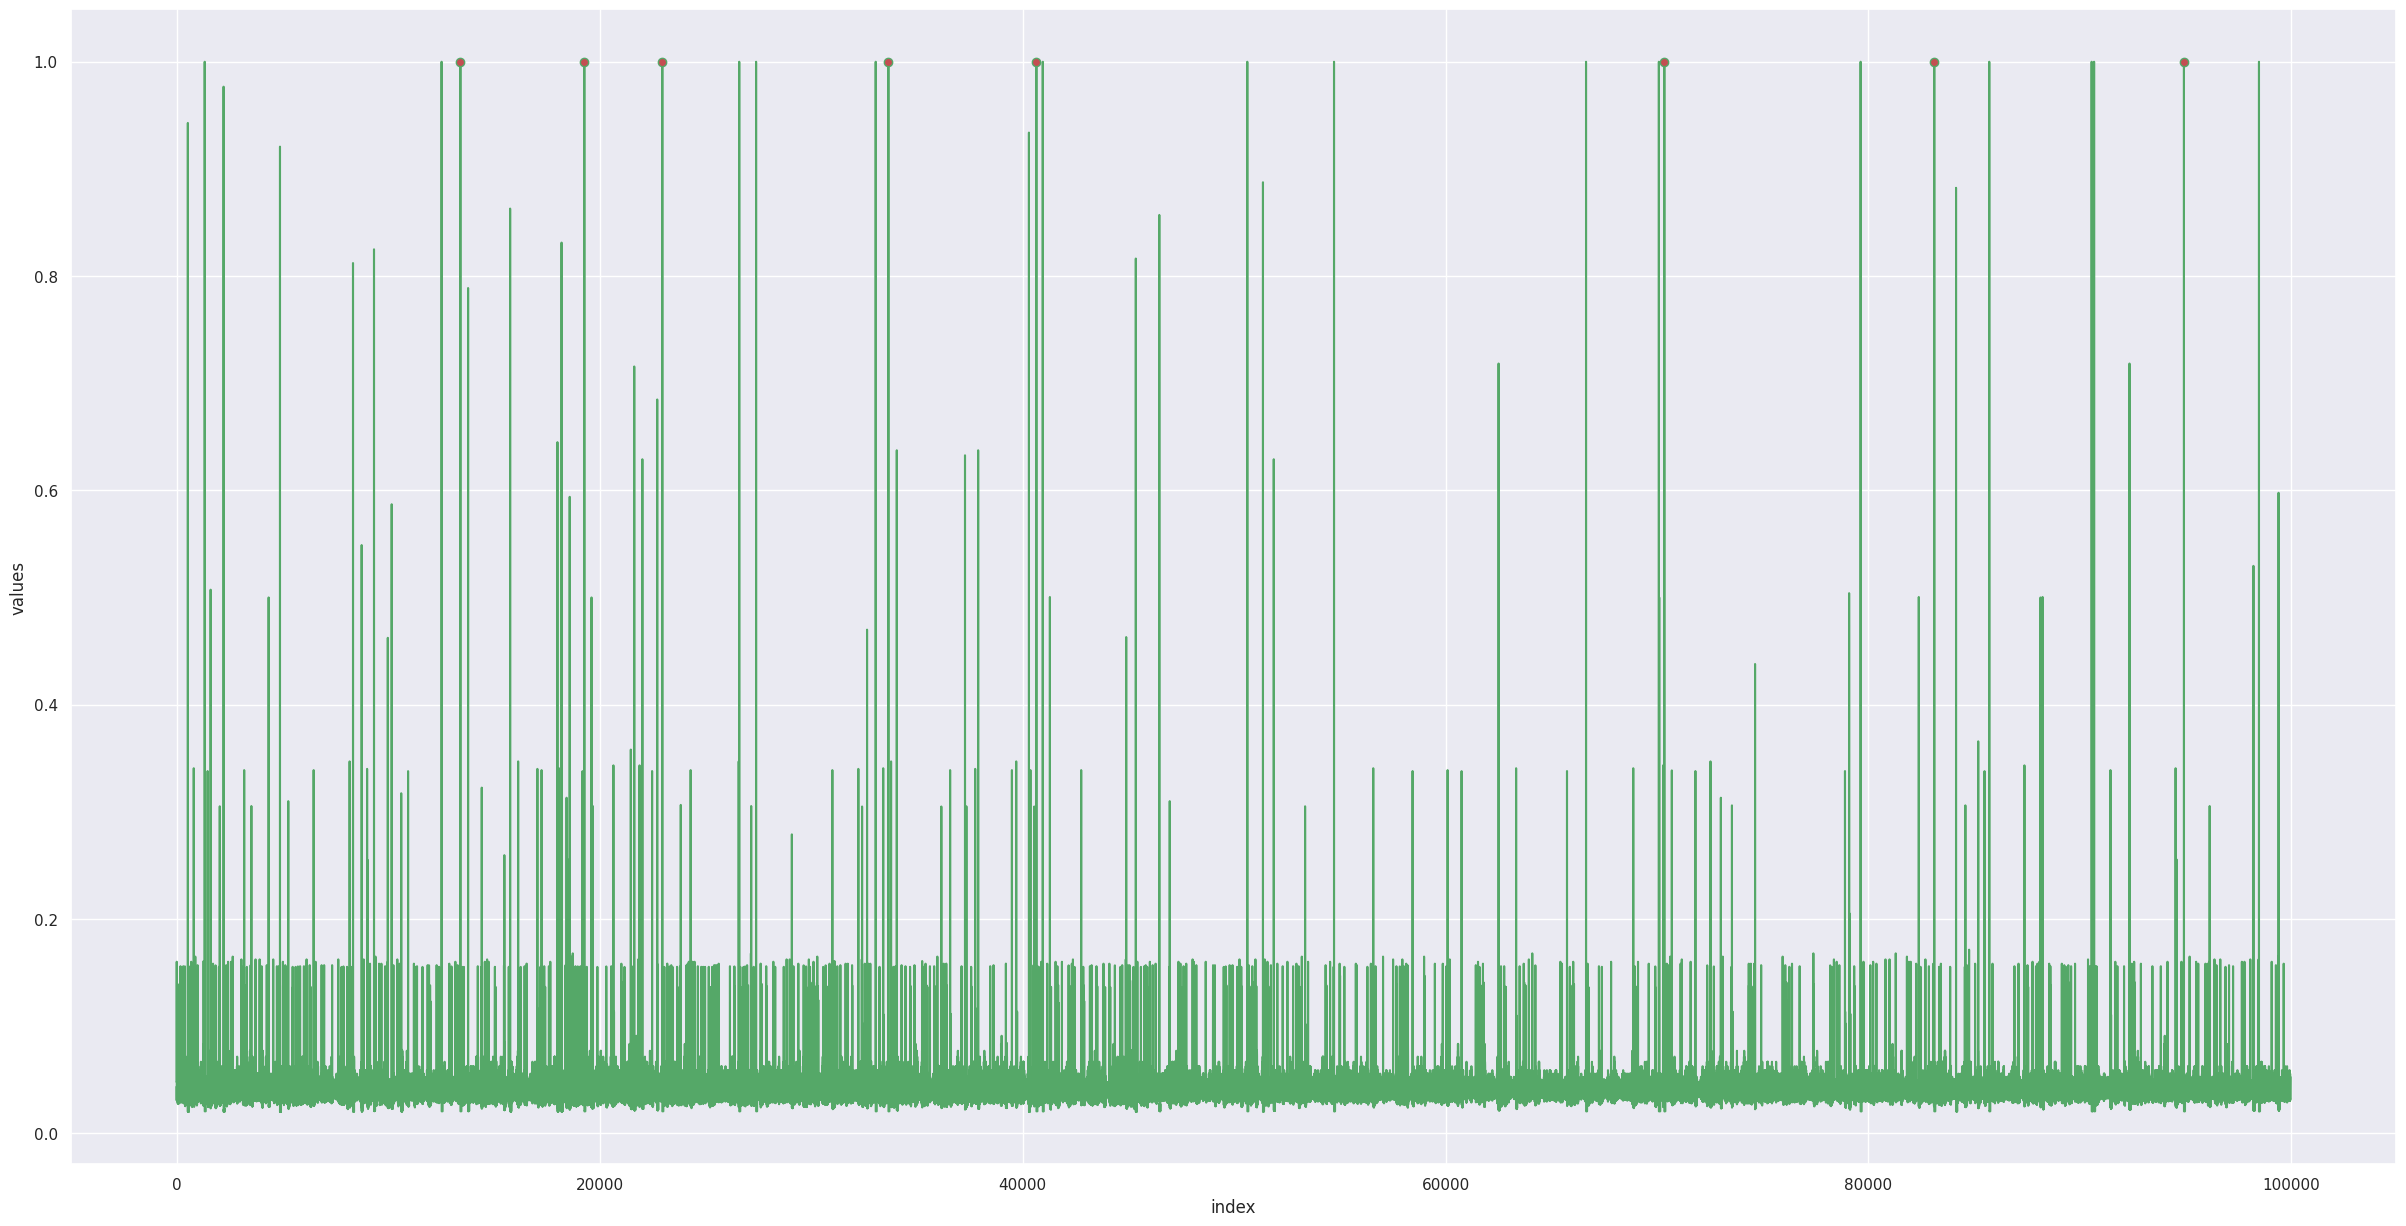

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(range(0, 99950), first_array, '-go', markevery=[83112, 22964, 40653, 70347, 13415, 33654, 19276, 94919], markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('values')

In [ ]:
sorted_second_array = sorted(second_array)[len(second_array) - 10:]
print(np.argwhere(second_array == sorted_second_array[0]))
print(np.argwhere(second_array == sorted_second_array[1]))
print(np.argwhere(second_array == sorted_second_array[2]))
print(np.argwhere(second_array == sorted_second_array[3]))
print(np.argwhere(second_array == sorted_second_array[4]))
print(np.argwhere(second_array == sorted_second_array[5]))
print(np.argwhere(second_array == sorted_second_array[6]))
print(np.argwhere(second_array == sorted_second_array[7]))
print(np.argwhere(second_array == sorted_second_array[8]))
print(np.argwhere(second_array == sorted_second_array[9]))

[[36765]]
[[49199]]
[[85252]]
[[48596]]
[[21734]]
[[18281]]
[[5091]]
[[89447]]
[[22696]]
[[20574]]


Text(0, 0.5, 'values')

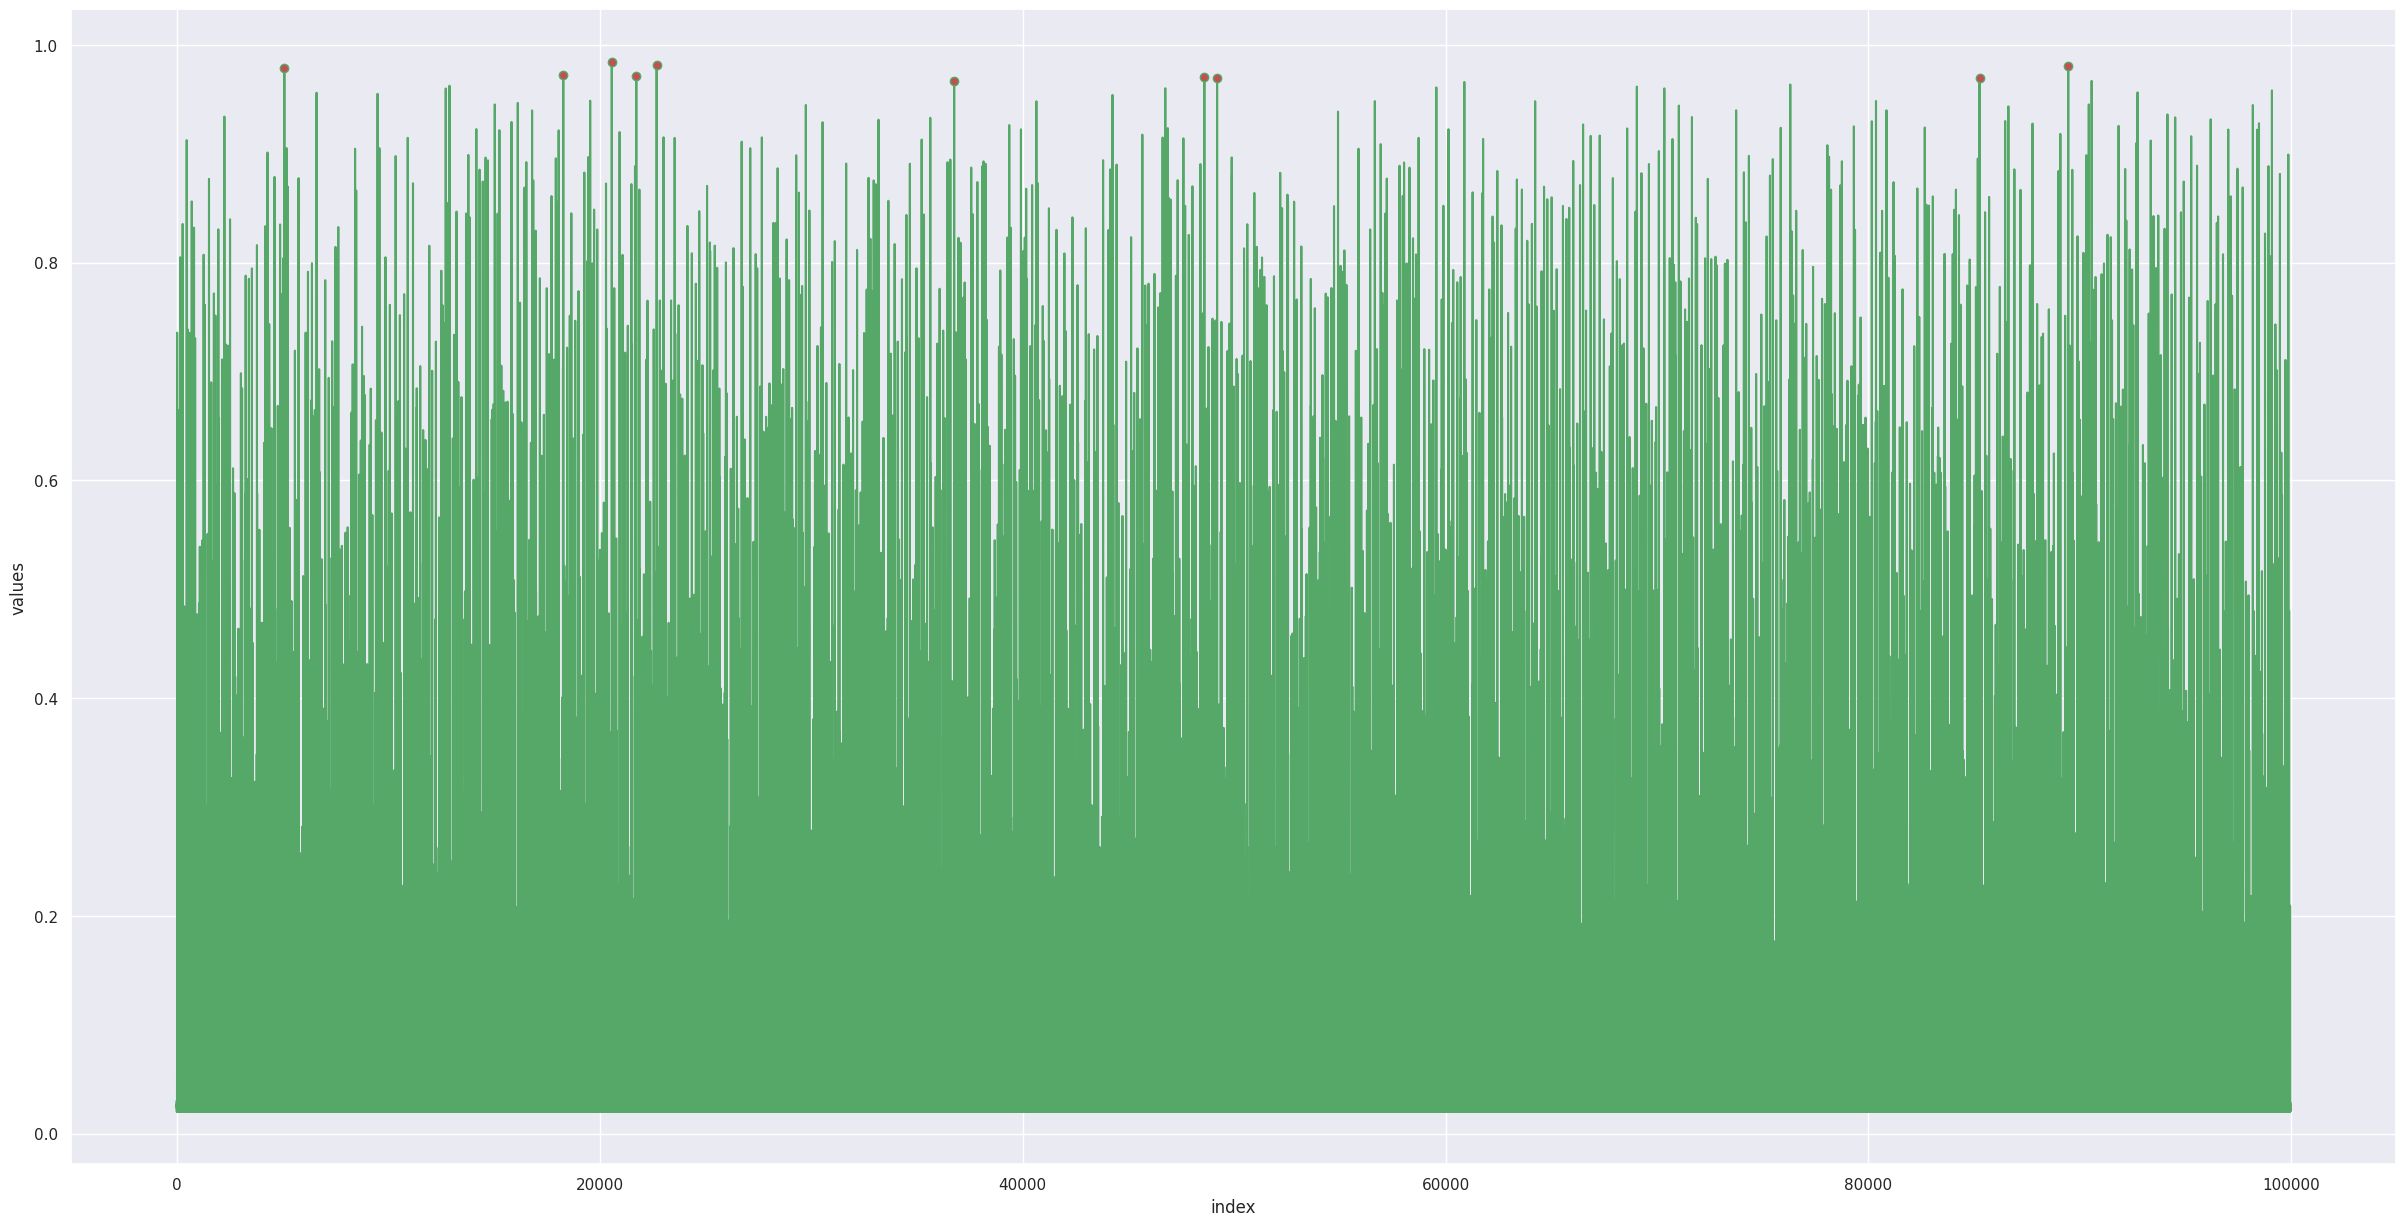

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(range(0, 99950), second_array, '-go', markevery=[36765, 49199, 85252, 48596, 21734, 18281, 5091, 89447, 22696, 20574], markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('values')

In [ ]:
sorted_third_array = sorted(third_array)[len(third_array) - 10:]
print(np.argwhere(third_array == sorted_third_array[0]))
print(np.argwhere(third_array == sorted_third_array[1]))
print(np.argwhere(third_array == sorted_third_array[2]))
print(np.argwhere(third_array == sorted_third_array[3]))
print(np.argwhere(third_array == sorted_third_array[4]))
print(np.argwhere(third_array == sorted_third_array[5]))
print(np.argwhere(third_array == sorted_third_array[6]))
print(np.argwhere(third_array == sorted_third_array[7]))
print(np.argwhere(third_array == sorted_third_array[8]))
print(np.argwhere(third_array == sorted_third_array[9]))

[[   0]
 [  50]
 [ 100]
 [ 150]
 [ 200]
 [ 250]
 [ 300]
 [ 350]
 [ 400]
 [ 450]
 [ 500]
 [ 585]
 [ 635]
 [ 685]
 [ 735]
 [ 785]
 [ 835]
 [ 885]
 [ 935]
 [ 985]
 [1035]
 [1085]
 [1170]
 [1220]
 [1270]
 [1320]
 [1370]
 [1420]
 [1477]
 [1527]
 [1577]
 [1627]
 [1677]
 [1727]
 [1777]
 [1827]
 [1877]
 [1927]
 [1977]
 [2027]
 [2077]
 [2127]
 [2177]
 [2227]
 [2277]
 [2327]
 [2377]
 [2427]
 [2477]
 [2527]
 [2577]
 [2627]
 [2677]
 [2729]
 [2783]
 [2833]
 [2883]
 [2933]
 [2983]
 [3033]
 [3083]
 [3133]
 [3183]
 [3233]
 [3283]
 [3333]
 [3383]
 [3433]
 [3483]
 [3533]
 [3583]
 [3633]
 [3683]
 [3733]
 [3783]
 [3833]
 [3883]
 [3933]
 [3983]
 [4033]
 [4083]
 [4133]
 [4183]
 [4273]
 [4323]
 [4373]
 [4423]
 [4473]
 [4523]
 [4573]
 [4623]
 [4673]
 [4723]
 [4773]
 [4823]
 [4873]
 [4968]
 [5018]
 [5068]
 [5118]
 [5168]
 [5218]
 [5268]
 [5318]
 [5368]
 [5418]
 [5468]
 [5518]
 [5568]
 [5618]
 [5668]
 [5736]
 [5786]
 [5836]
 [5886]
 [5936]
 [5986]
 [6036]
 [6104]
 [6154]
 [6204]
 [6254]
 [6304]
 [6354]
 [6404]


Text(0, 0.5, 'values')

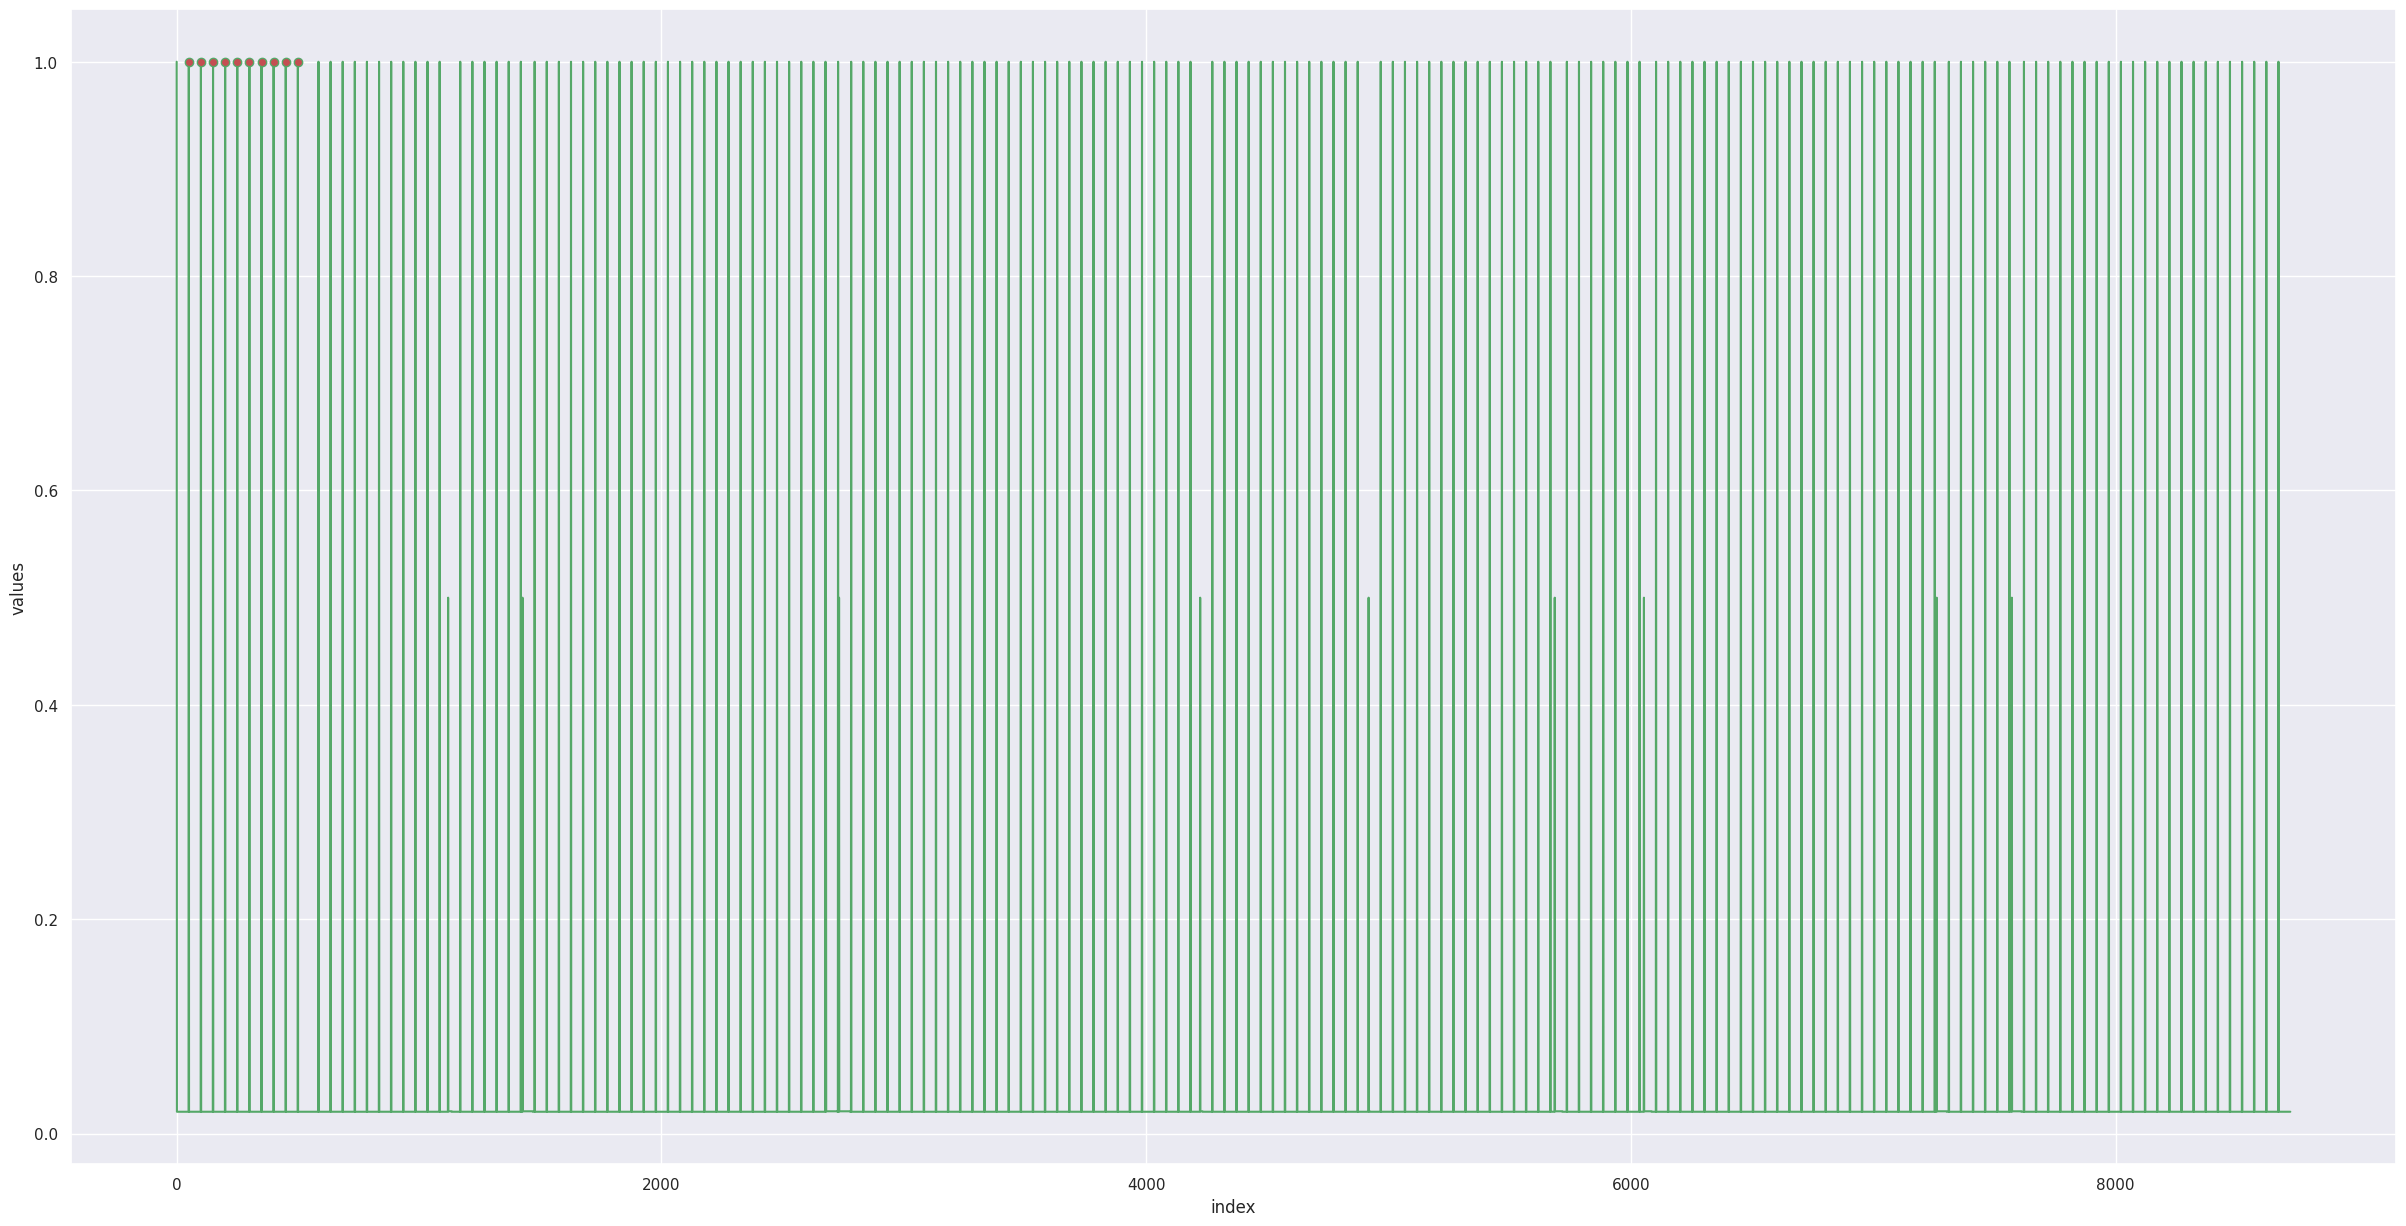

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(range(0, third_array.shape[0]), third_array, '-go', markevery=[50, 100, 150, 200, 250, 300, 350, 400, 450, 500], markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('values')

In [ ]:
sorted_fourth_array = sorted(fourth_array)[len(fourth_array) - 10:]
print(np.argwhere(fourth_array == sorted_fourth_array[0]))
print(np.argwhere(fourth_array == sorted_fourth_array[1]))
print(np.argwhere(fourth_array == sorted_fourth_array[2]))
print(np.argwhere(fourth_array == sorted_fourth_array[3]))
print(np.argwhere(fourth_array == sorted_fourth_array[4]))
print(np.argwhere(fourth_array == sorted_fourth_array[5]))
print(np.argwhere(fourth_array == sorted_fourth_array[6]))
print(np.argwhere(fourth_array == sorted_fourth_array[7]))
print(np.argwhere(fourth_array == sorted_fourth_array[8]))
print(np.argwhere(fourth_array == sorted_fourth_array[9]))

[[33429]]
[[1572]]
[[6228]]
[[13252]]
[[30768]]
[[51704]]
[[17444]]
[[51920]]
[[5839]]
[[35378]]


Text(0, 0.5, 'values')

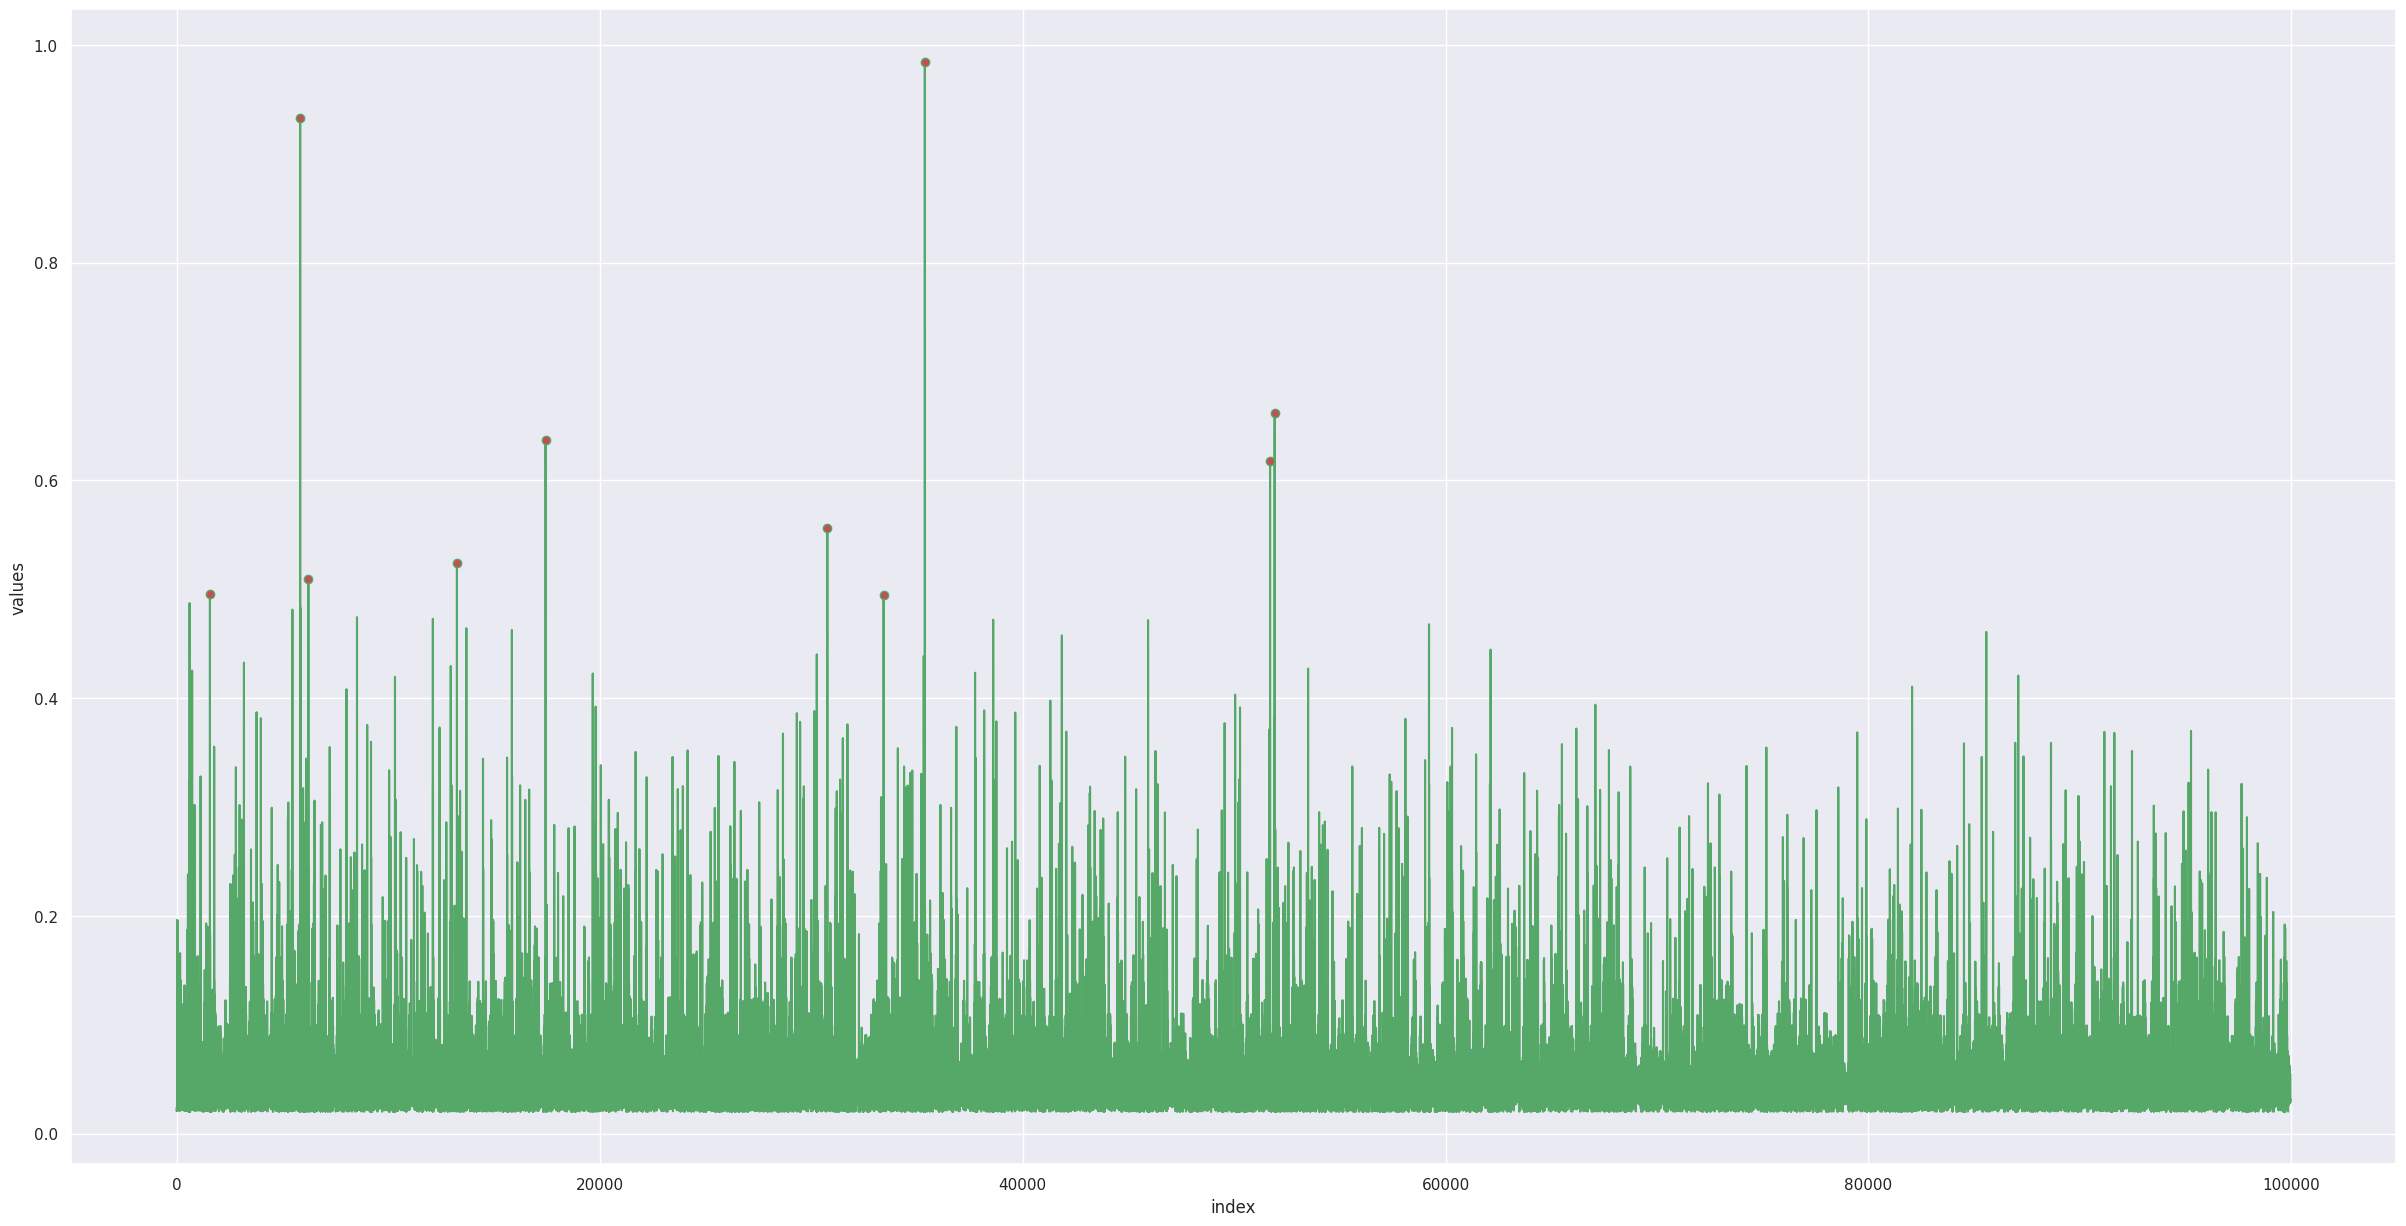

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(range(0, fourth_array.shape[0]), fourth_array, '-go', markevery=[33429, 1572, 6228, 13252, 30768, 51704, 17444, 51920, 5839, 35378], markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('values')

In [ ]:
sorted_fifth_array = sorted(fifth_array)[len(fifth_array) - 10:]
print(np.argwhere(fifth_array == sorted_fifth_array[0]))
print(np.argwhere(fifth_array == sorted_fifth_array[1]))
print(np.argwhere(fifth_array == sorted_fifth_array[2]))
print(np.argwhere(fifth_array == sorted_fifth_array[3]))
print(np.argwhere(fifth_array == sorted_fifth_array[4]))
print(np.argwhere(fifth_array == sorted_fifth_array[5]))
print(np.argwhere(fifth_array == sorted_fifth_array[6]))
print(np.argwhere(fifth_array == sorted_fifth_array[7]))
print(np.argwhere(fifth_array == sorted_fifth_array[8]))
print(np.argwhere(fifth_array == sorted_fifth_array[9]))

[[50748]]
[[46690]]
[[42403]]
[[51697]]
[[16442]]
[[20978]]
[[21150]]
[[11633]]
[[30151]]
[[30015]]


Text(0, 0.5, 'values')

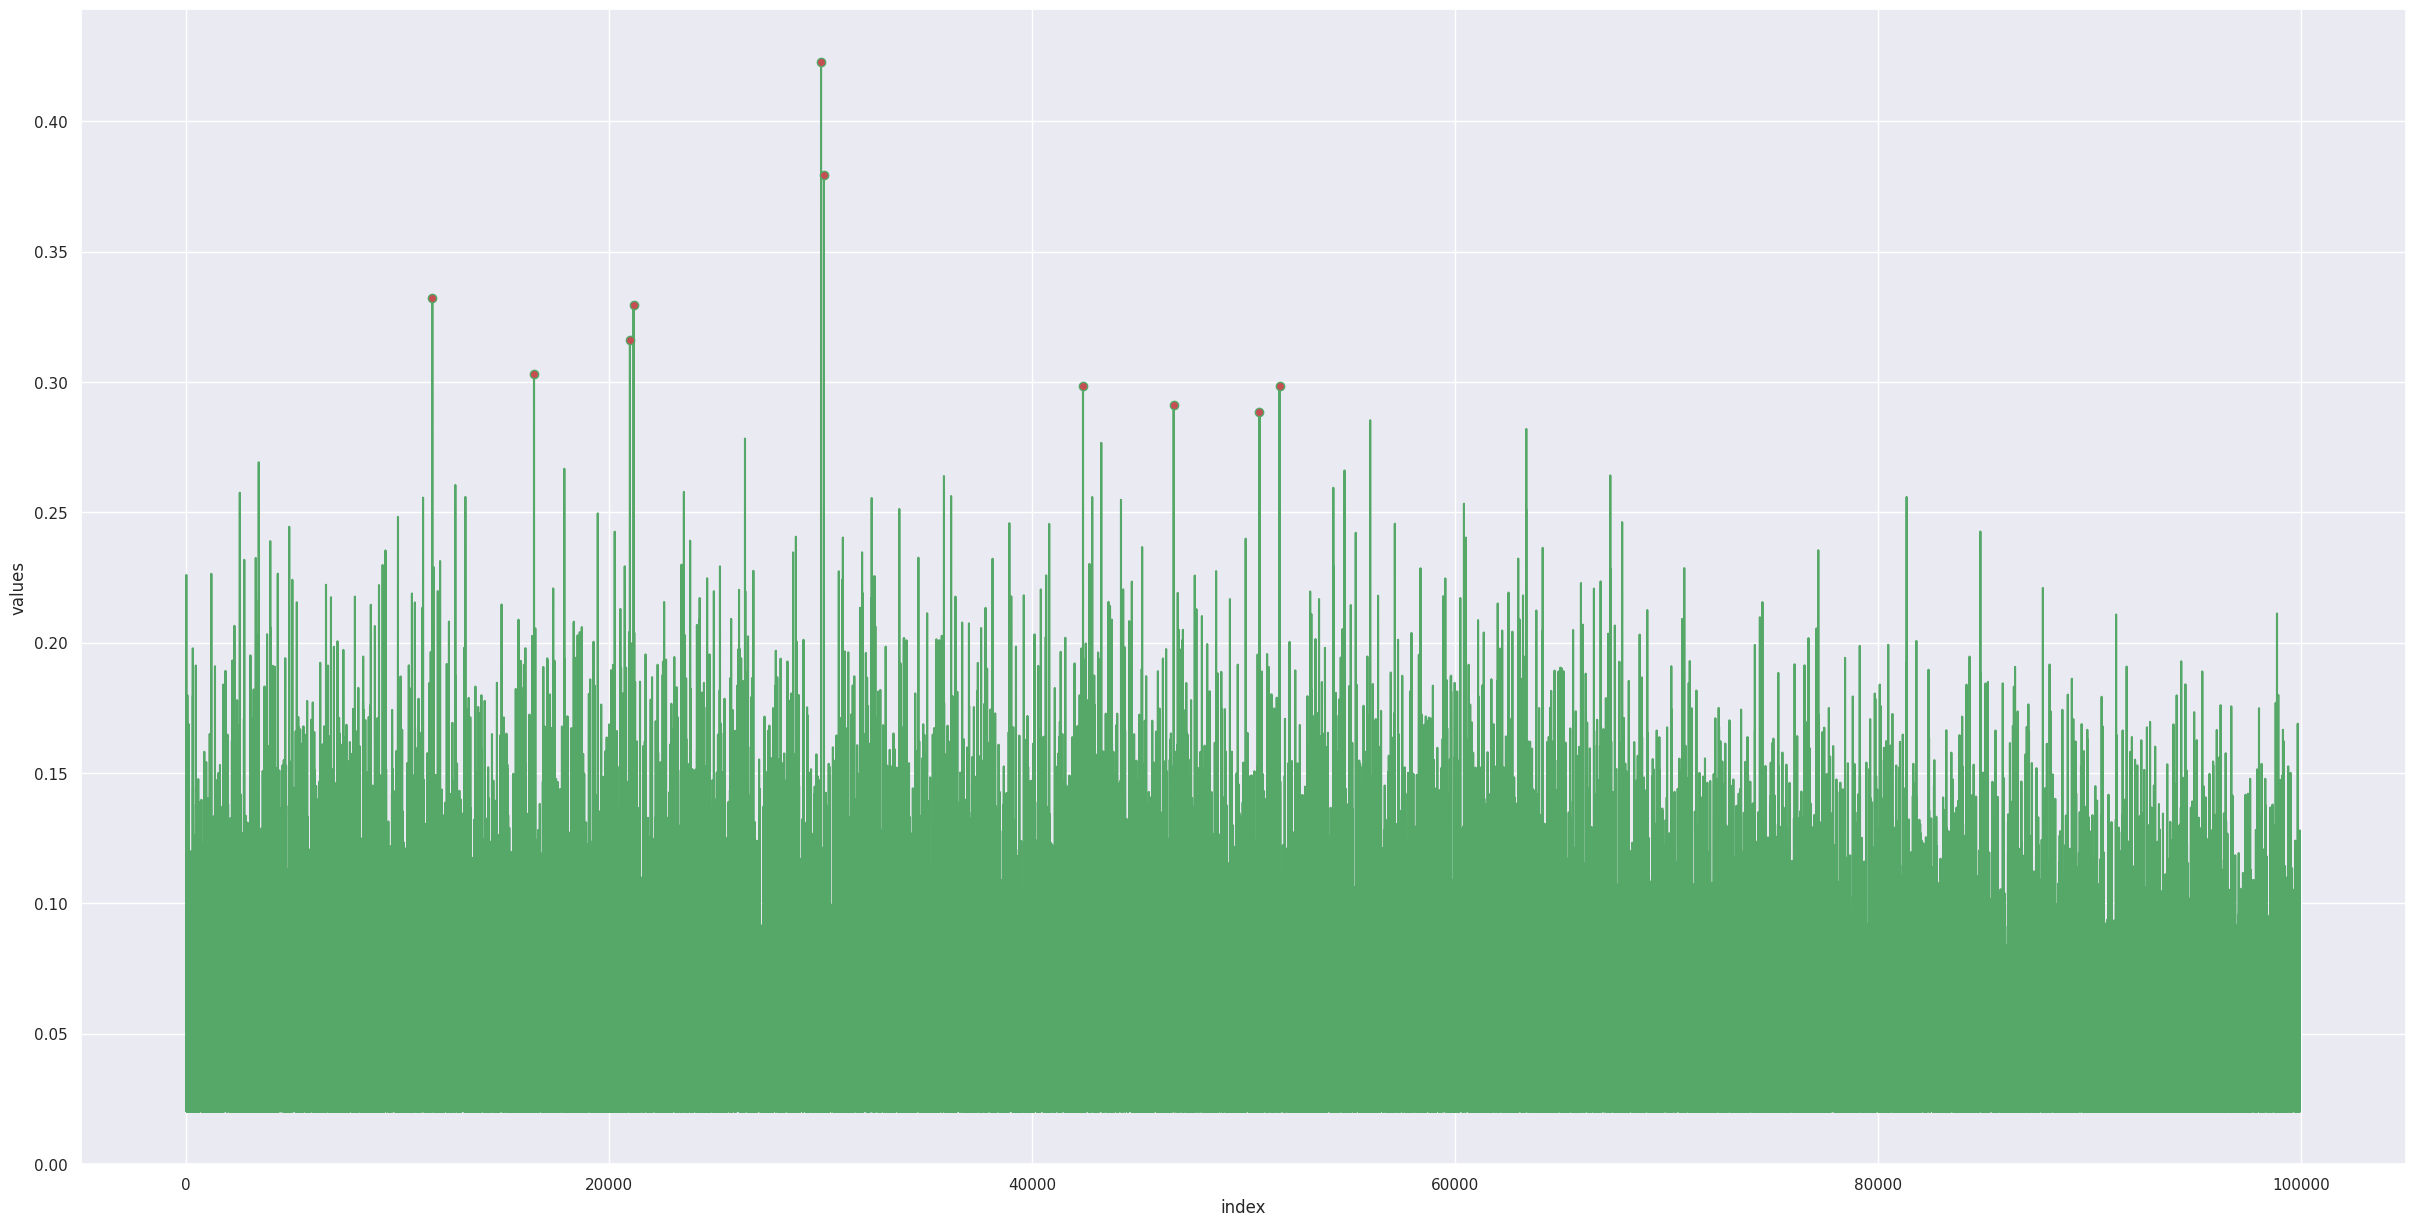

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(range(0, fifth_array.shape[0]), fifth_array, '-go', markevery=[50748, 46690, 42403, 51697, 16442, 20978, 21150, 11633, 30151, 30015], markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('values')

In [ ]:
sorted_sixth_array = sorted(sixth_array)[len(sixth_array) - 10:]
print(np.argwhere(sixth_array == sorted_sixth_array[0]))
print(np.argwhere(sixth_array == sorted_sixth_array[1]))
print(np.argwhere(sixth_array == sorted_sixth_array[2]))
print(np.argwhere(sixth_array == sorted_sixth_array[3]))
print(np.argwhere(sixth_array == sorted_sixth_array[4]))
print(np.argwhere(sixth_array == sorted_sixth_array[5]))
print(np.argwhere(sixth_array == sorted_sixth_array[6]))
print(np.argwhere(sixth_array == sorted_sixth_array[7]))
print(np.argwhere(sixth_array == sorted_sixth_array[8]))
print(np.argwhere(sixth_array == sorted_sixth_array[9]))

[[78154]]
[[98044]]
[[98045]]
[[97839]]
[[58871]]
[[93001]]
[[34761]]
[[63405]]
[[54134]]
[[63404]]


Text(0, 0.5, 'values')

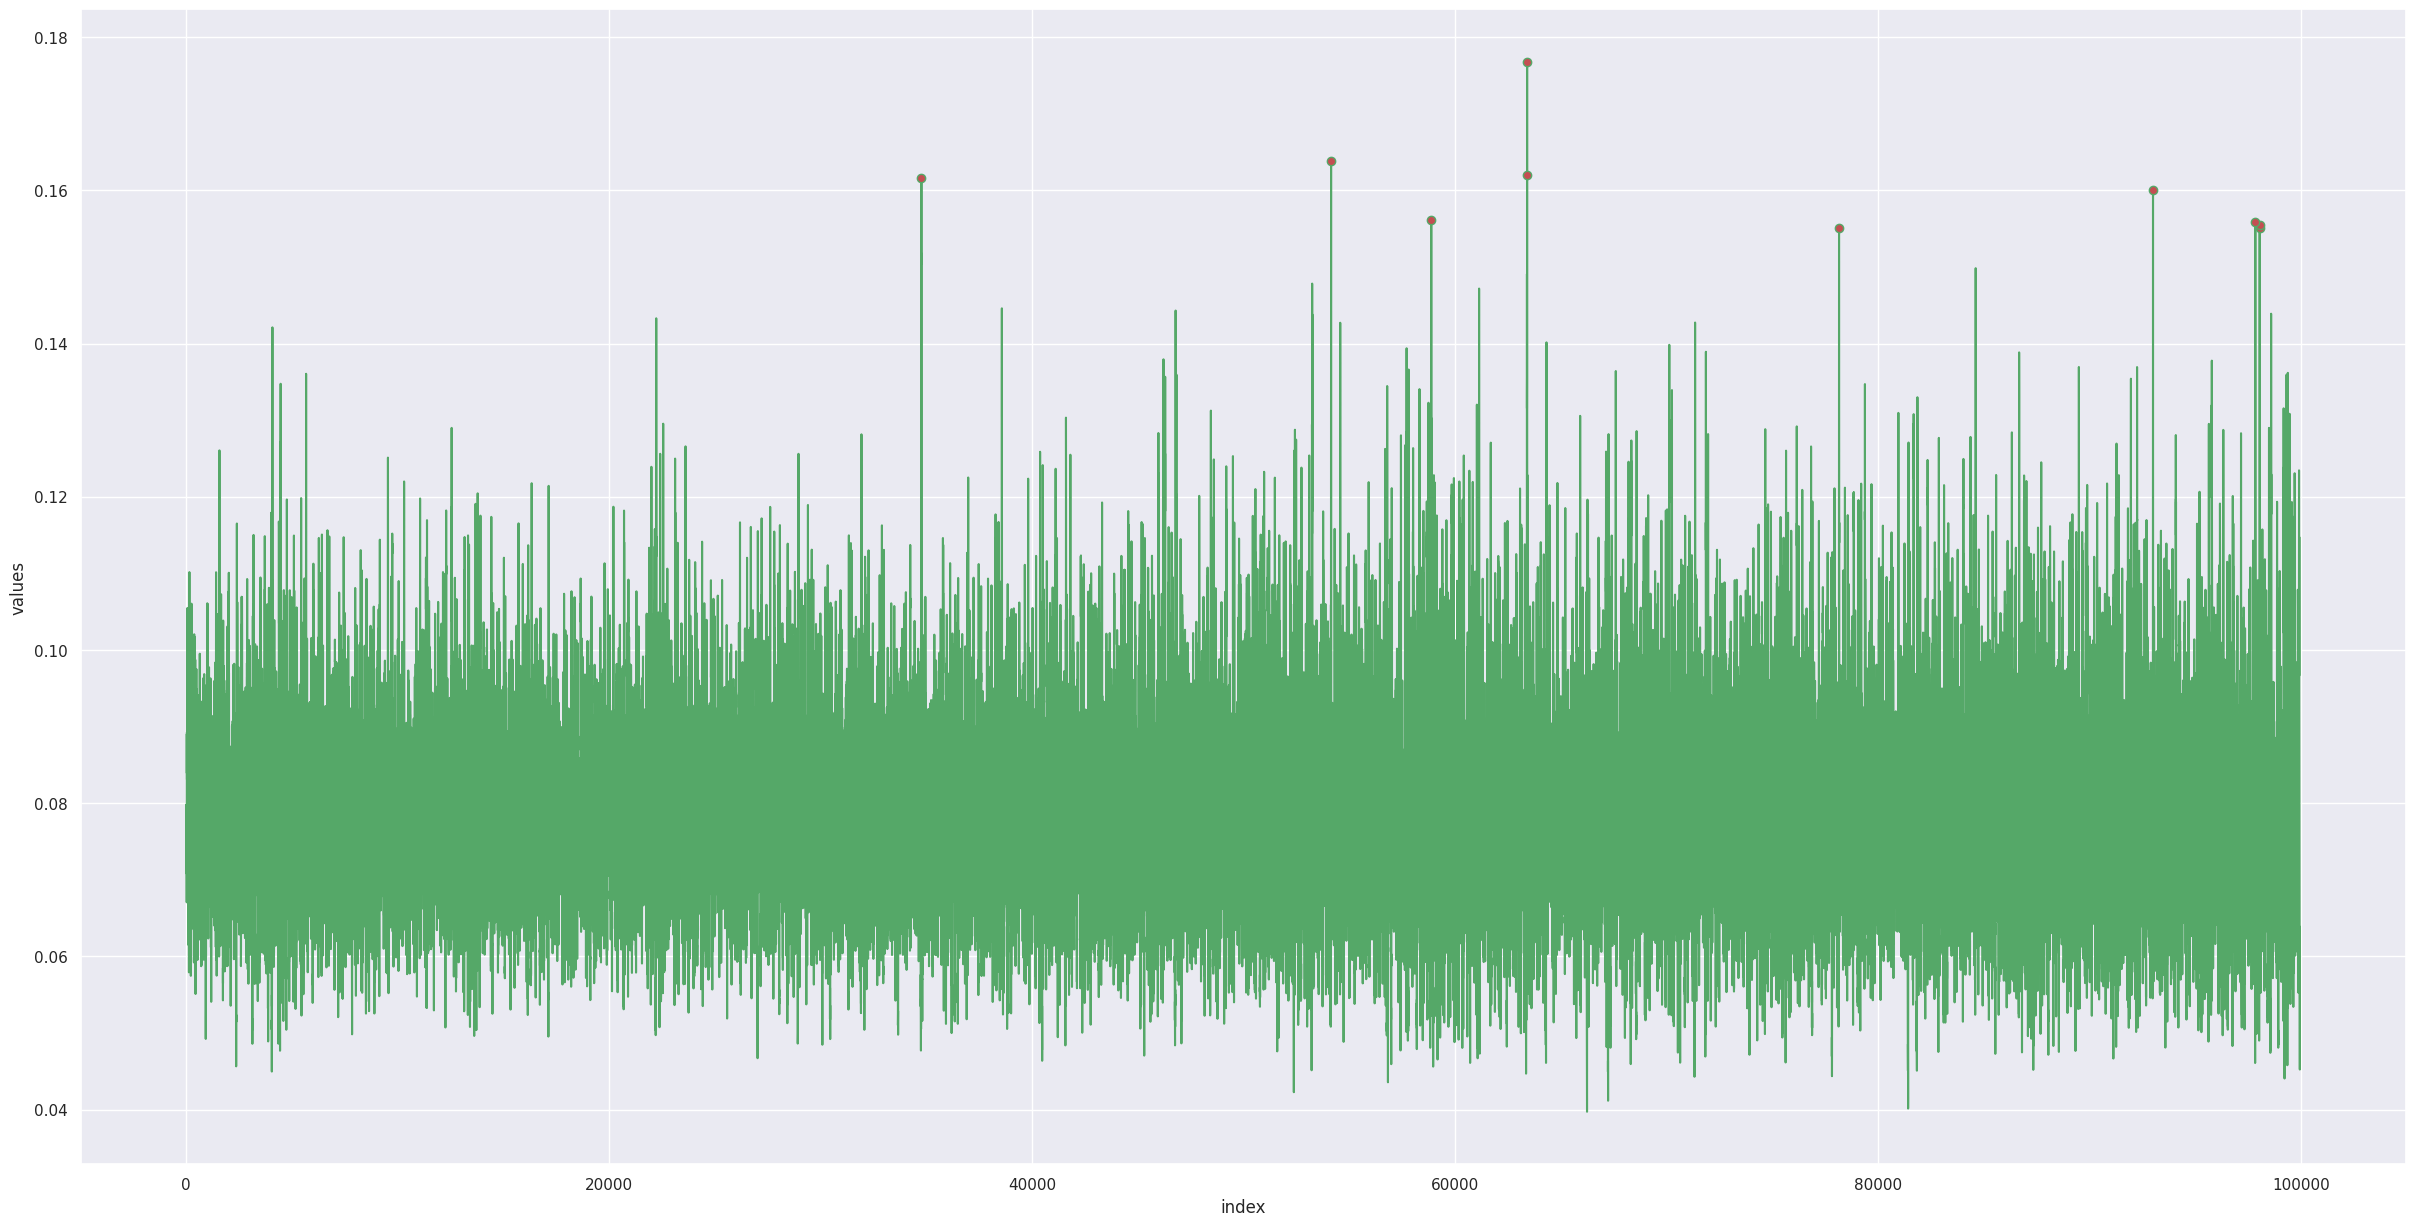

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(range(0, sixth_array.shape[0]), sixth_array, '-go', markevery=[78154, 98044, 98045, 97839, 58871, 93001, 34761, 63405, 54134, 63404], markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('values')

### Multidimensional case

In [ ]:
# statistical model multidimensional case
leverage_statistic_values = list()
design_matrix_product_inverse = np.linalg.inv(np.dot(np.transpose(logs_df_statistical_method.to_numpy()), logs_df_statistical_method.to_numpy()))
for i in tqdm(range(0, logs_df_statistical_method.shape[0])):
  leverage_statistic = np.dot(np.dot(np.transpose(logs_df_statistical_method.iloc[i].to_numpy()), design_matrix_product_inverse), logs_df_statistical_method.iloc[i].to_numpy())
  leverage_statistic_values.append(leverage_statistic)

100%|██████████| 100000/100000 [00:15<00:00, 6642.40it/s]


In [ ]:
sorted(leverage_statistic_values)[len(leverage_statistic_values) - 10:]

[0.04163944695359865,
 0.04163958156500932,
 0.04164045669182761,
 0.041643570826702815,
 0.04164378382518944,
 0.041645203350763146,
 0.041645550348769655,
 0.04165181494164688,
 0.04166103677993254,
 0.041665755458800954]

[Text(0.5, 0, 'leverage statistics values'),
 Text(0, 0.5, 'count (number of values)')]

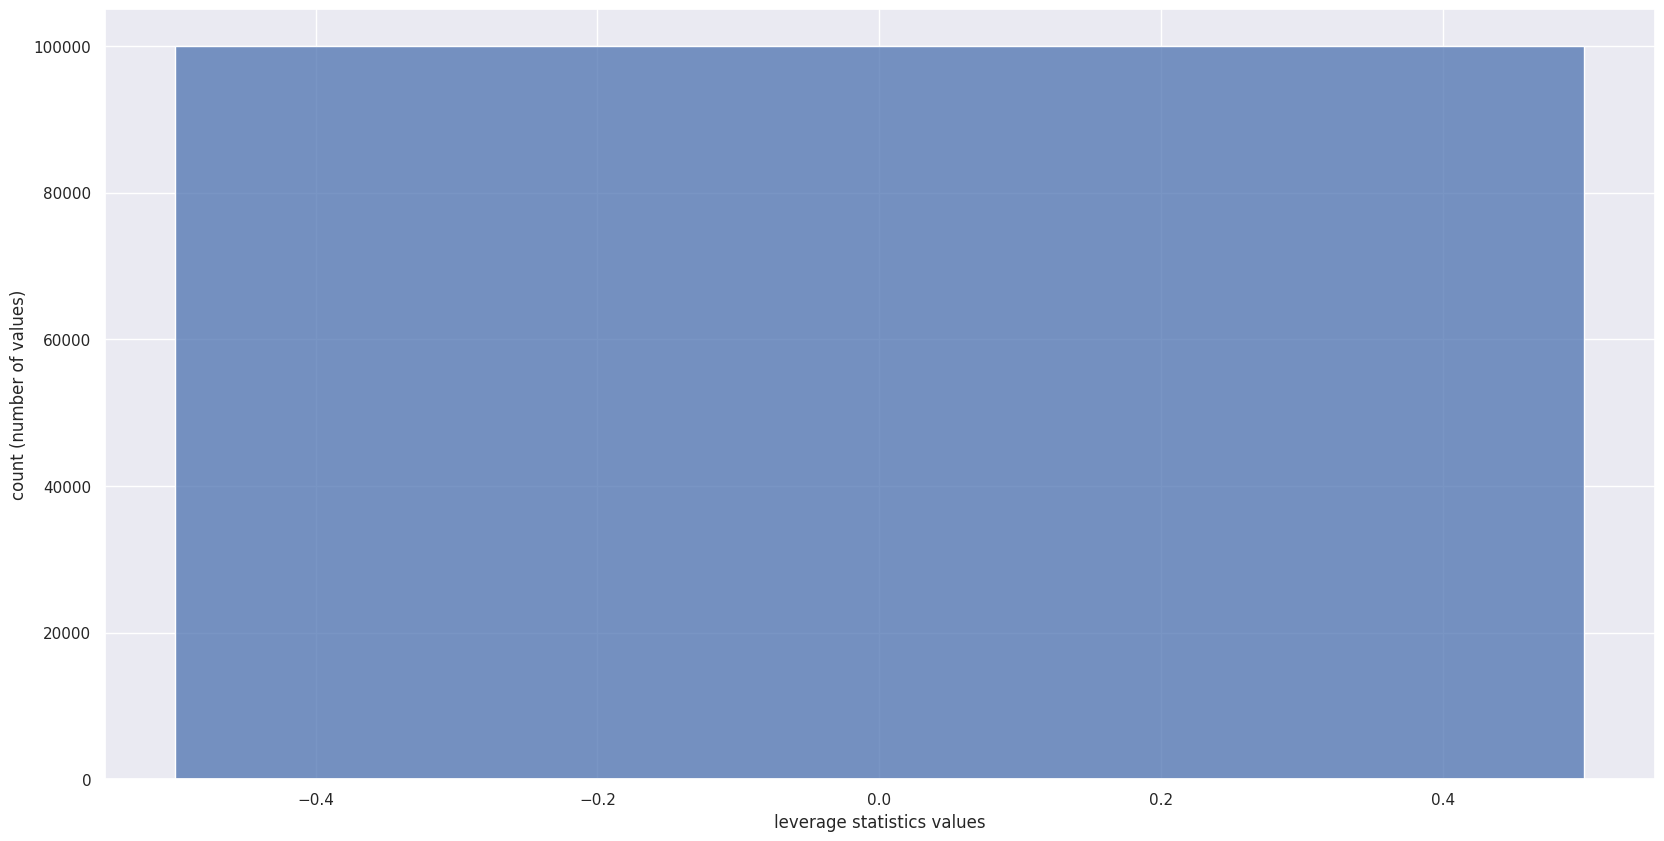

In [ ]:
sns.set(rc={'figure.figsize':(20, 10)})
ax = sns.histplot(leverage_statistic_values, kde=False)
ax.set(xlabel="leverage statistics values", ylabel='count (number of values)')

## Threshold 2 * (p + 1) / n

In [ ]:
'''# statistical model unidimensional case
anomalies_features_threshold_2_1d = list()
anomalies_indices_threshold_2_1d = list()
for column in logs_df_statistical_method.columns:
    for i in tqdm(range(1, logs_df_statistical_method.shape[0])):
        if i == 1:
          current_mean = np.mean(logs_df_statistical_method[column][:2])
        else:
          current_mean = ((i - 1) * previous_mean + logs_df_statistical_method[column][i]) * 1/i
        leverage_statistic = 1/i + np.power(logs_df_statistical_method[column][i] - current_mean, 2) / (np.var(logs_df_statistical_method[column][:i]) * 1/i)
        if leverage_statistic > (2 * 2) / i: # hi > 2 * (p + 1) / n
            anomalies_features_threshold_2_1d.append(column)
            anomalies_indices_threshold_2_1d.append(i)
        previous_mean = current_mean'''

  0%|          | 0/99999 [00:00<?, ?it/s]<ipython-input-33-8ef9a724f955>:10: RuntimeWarning: divide by zero encountered in double_scalars
  leverage_statistic = 1/i + np.power(logs_df_statistical_method[column][i] - current_mean, 2) / (np.var(logs_df_statistical_method[column][:i]) * 1/i)
  0%|          | 0/99999 [00:00<?, ?it/s]<ipython-input-33-8ef9a724f955>:10: RuntimeWarning: invalid value encountered in double_scalars
  leverage_statistic = 1/i + np.power(logs_df_statistical_method[column][i] - current_mean, 2) / (np.var(logs_df_statistical_method[column][:i]) * 1/i)
100%|██████████| 99999/99999 [00:34<00:00, 2861.72it/s]


In [ ]:
# analyzing the output
len(set(anomalies_indices_threshold_2_1d))

99999

In [ ]:
# analyzing the output
np.unique(np.array(anomalies_features_threshold_2_1d), return_counts=True)

(array(['number of requests', 'received_bytes', 'request_processing_time',
        'response_processing_time', 'sent_bytes', 'target_processing_time'],
       dtype='<U24'),
 array([99999, 99995, 99951, 99627, 99988, 99978]))

In [ ]:
(set(range(100000))).difference(set(anomalies_indices_threshold_2_1d))

{0}

## Threshold 3 * (p + 1) / n

Threshold hi > 2 * (p + 1) / n was too small as all observations were marked as unusual. We will use hi > 3 * (p + 1) / n as threshold instead.

In [ ]:
'''# statistical model unidimensional case
anomalies_features_threshold_3 = list()
anomalies_indices_threshold_3 = list()
for column in logs_df_statistical_method.columns:
    for i in tqdm(range(1, logs_df_statistical_method.shape[0])):
        if i == 1:
          current_mean = np.mean(logs_df_statistical_method[column][:2])
        else:
          current_mean = ((i - 1) * previous_mean + logs_df_statistical_method[column][i]) * 1/i
        leverage_statistic = 1/i + np.power(logs_df_statistical_method[column][i] - current_mean, 2) / (np.var(logs_df_statistical_method[column][:i]) * 1/i)
        if leverage_statistic > (3 * 2) / i: # hi > 3 * (p + 1) / n
            anomalies_features_threshold_3.append(column)
            anomalies_indices_threshold_3.append(i)
        previous_mean = current_mean'''

  0%|          | 0/99999 [00:00<?, ?it/s]<ipython-input-11-85a8ef77641b>:10: RuntimeWarning: divide by zero encountered in double_scalars
  leverage_statistic = 1/i + np.power(logs_df_statistical_method[column][i] - current_mean, 2) / (np.var(logs_df_statistical_method[column][:i]) * 1/i)
  0%|          | 0/99999 [00:00<?, ?it/s]<ipython-input-11-85a8ef77641b>:10: RuntimeWarning: invalid value encountered in double_scalars
  leverage_statistic = 1/i + np.power(logs_df_statistical_method[column][i] - current_mean, 2) / (np.var(logs_df_statistical_method[column][:i]) * 1/i)
100%|██████████| 99999/99999 [00:37<00:00, 2667.75it/s]


In [ ]:
# analyzing the output
len(set(anomalies_indices_threshold_3))

99998

In [ ]:
# analyzing the output
np.unique(np.array(anomalies_features_threshold_3), return_counts=True)

(array(['number of requests', 'received_bytes', 'request_processing_time',
        'response_processing_time', 'sent_bytes', 'target_processing_time'],
       dtype='<U24'),
 array([99998, 99994, 99933, 99627, 99987, 99967]))

In [ ]:
(set(range(100000))).difference(set(anomalies_indices_threshold_3))

{0, 2}

Observation 0 is never included

In [ ]:
'''# statistical model multidimensional case
anomalies_indices_md_threshold_3 = list()
leverage_statistics_md_threshold_3 = list()
design_matrix_product_inverse = np.linalg.inv(np.dot(np.transpose(logs_df_statistical_method.to_numpy()), logs_df_statistical_method.to_numpy()))
for i in tqdm(range(1, logs_df_statistical_method.shape[0])):
  leverage_statistic = np.dot(np.dot(np.transpose(logs_df_statistical_method.iloc[0].to_numpy()), design_matrix_product_inverse), logs_df_statistical_method.iloc[0].to_numpy())
  leverage_statistics_md_threshold_3.append(leverage_statistic)
  if leverage_statistic > (3 * (7)) / i: # hi > 3 * (p + 1) / n
    anomalies_indices_md_threshold_3.append(i)'''

100%|██████████| 99999/99999 [00:15<00:00, 6611.68it/s]


In [ ]:
# analyzing the output
len(anomalies_indices_md_threshold_3)

0

In [ ]:
set(anomalies_indices_threshold_3).intersection(set(anomalies_indices_md_threshold_3))

set()

In [ ]:
len(set(anomalies_indices_threshold_3).difference(set(anomalies_indices_md_threshold_3)))

99998

## Threshold 5 * (p + 1) / n

In [ ]:
'''# statistical model unidimensional case
anomalies_features_threshold_5 = list()
anomalies_indices_threshold_5 = list()
for column in logs_df_statistical_method.columns:
    for i in tqdm(range(1, logs_df_statistical_method.shape[0])):
        if i == 1:
          current_mean = np.mean(logs_df_statistical_method[column][:2])
        else:
          current_mean = ((i - 1) * previous_mean + logs_df_statistical_method[column][i]) * 1/i
        leverage_statistic = 1/i + np.power(logs_df_statistical_method[column][i] - current_mean, 2) / (np.var(logs_df_statistical_method[column][:i]) * 1/i)
        if leverage_statistic > (5 * 2) / i: # hi > 5 * (p + 1) / n
            anomalies_features_threshold_5.append(column)
            anomalies_indices_threshold_5.append(i)
        previous_mean = current_mean'''

  0%|          | 0/99999 [00:00<?, ?it/s]<ipython-input-19-756b3e026ca1>:10: RuntimeWarning: divide by zero encountered in double_scalars
  leverage_statistic = 1/i + np.power(logs_df_statistical_method[column][i] - current_mean, 2) / (np.var(logs_df_statistical_method[column][:i]) * 1/i)
  0%|          | 0/99999 [00:00<?, ?it/s]<ipython-input-19-756b3e026ca1>:10: RuntimeWarning: invalid value encountered in double_scalars
  leverage_statistic = 1/i + np.power(logs_df_statistical_method[column][i] - current_mean, 2) / (np.var(logs_df_statistical_method[column][:i]) * 1/i)
100%|██████████| 99999/99999 [00:37<00:00, 2647.82it/s]


In [ ]:
# analyzing the output
len(set(anomalies_indices_threshold_5))

99997

In [ ]:
# analyzing the output
np.unique(np.array(anomalies_features_threshold_5), return_counts=True)

(array(['number of requests', 'received_bytes', 'request_processing_time',
        'response_processing_time', 'sent_bytes', 'target_processing_time'],
       dtype='<U24'),
 array([99996, 99992, 99909, 99627, 99983, 99953]))

In [ ]:
(set(range(100000))).difference(set(anomalies_indices_threshold_5))

{0, 2, 4}

Observation 0 is never included

## Threshold 7 * (p + 1) / n

In [ ]:
'''# statistical model unidimensional case
anomalies_features_threshold_7 = list()
anomalies_indices_threshold_7 = list()
for column in logs_df_statistical_method.columns:
    for i in tqdm(range(1, logs_df_statistical_method.shape[0])):
        if i == 1:
          current_mean = np.mean(logs_df_statistical_method[column][:2])
        else:
          current_mean = ((i - 1) * previous_mean + logs_df_statistical_method[column][i]) * 1/i
        leverage_statistic = 1/i + np.power(logs_df_statistical_method[column][i] - current_mean, 2) / (np.var(logs_df_statistical_method[column][:i]) * 1/i)
        if leverage_statistic > (7 * 2) / i: # hi > 7 * (p + 1) / n
            anomalies_features_threshold_7.append(column)
            anomalies_indices_threshold_7.append(i)
        previous_mean = current_mean'''

  0%|          | 0/99999 [00:00<?, ?it/s]<ipython-input-23-8e8d5a5496f7>:10: RuntimeWarning: divide by zero encountered in double_scalars
  leverage_statistic = 1/i + np.power(logs_df_statistical_method[column][i] - current_mean, 2) / (np.var(logs_df_statistical_method[column][:i]) * 1/i)
  0%|          | 0/99999 [00:00<?, ?it/s]<ipython-input-23-8e8d5a5496f7>:10: RuntimeWarning: invalid value encountered in double_scalars
  leverage_statistic = 1/i + np.power(logs_df_statistical_method[column][i] - current_mean, 2) / (np.var(logs_df_statistical_method[column][:i]) * 1/i)
100%|██████████| 99999/99999 [00:38<00:00, 2589.85it/s]


In [ ]:
# analyzing the output
len(set(anomalies_indices_threshold_7))

99997

In [ ]:
# analyzing the output
np.unique(np.array(anomalies_features_threshold_7), return_counts=True)

(array(['number of requests', 'received_bytes', 'request_processing_time',
        'response_processing_time', 'sent_bytes', 'target_processing_time'],
       dtype='<U24'),
 array([99996, 99987, 99881, 99627, 99980, 99944]))

In [ ]:
(set(range(100000))).difference(set(anomalies_indices_threshold_7))

{0, 2, 4}

Observation 0 is never included

## Threshold 9 * (p + 1) / n

In [ ]:
'''# statistical model unidimensional case
anomalies_features_threshold_9 = list()
anomalies_indices_threshold_9 = list()
for column in logs_df_statistical_method.columns:
    for i in tqdm(range(1, logs_df_statistical_method.shape[0])):
        if i == 1:
          current_mean = np.mean(logs_df_statistical_method[column][:2])
        else:
          current_mean = ((i - 1) * previous_mean + logs_df_statistical_method[column][i]) * 1/i
        leverage_statistic = 1/i + np.power(logs_df_statistical_method[column][i] - current_mean, 2) / (np.var(logs_df_statistical_method[column][:i]) * 1/i)
        if leverage_statistic > (9 * 2) / i: # hi > 7 * (p + 1) / n
            anomalies_features_threshold_9.append(column)
            anomalies_indices_threshold_9.append(i)
        previous_mean = current_mean'''

  0%|          | 0/99999 [00:00<?, ?it/s]<ipython-input-27-510bcfff0bef>:10: RuntimeWarning: divide by zero encountered in double_scalars
  leverage_statistic = 1/i + np.power(logs_df_statistical_method[column][i] - current_mean, 2) / (np.var(logs_df_statistical_method[column][:i]) * 1/i)
  0%|          | 0/99999 [00:00<?, ?it/s]<ipython-input-27-510bcfff0bef>:10: RuntimeWarning: invalid value encountered in double_scalars
  leverage_statistic = 1/i + np.power(logs_df_statistical_method[column][i] - current_mean, 2) / (np.var(logs_df_statistical_method[column][:i]) * 1/i)
100%|██████████| 99999/99999 [00:36<00:00, 2751.73it/s]


In [ ]:
# analyzing the output
len(set(anomalies_indices_threshold_9))

99997

In [ ]:
# analyzing the output
np.unique(np.array(anomalies_features_threshold_9), return_counts=True)

(array(['number of requests', 'received_bytes', 'request_processing_time',
        'response_processing_time', 'sent_bytes', 'target_processing_time'],
       dtype='<U24'),
 array([99995, 99986, 99869, 99627, 99976, 99939]))

In [ ]:
(set(range(100000))).difference(set(anomalies_indices_threshold_9))

{0, 2, 4}

Observation 0 is never included

## Threshold 2 * (p + 1) / n -- multiD

In [ ]:
'''# statistical model multidimensional case
anomalies_indices_md_threshold_2 = list()
leverage_statistics_md_threshold_2 = list()
design_matrix_product_inverse = np.linalg.inv(np.dot(np.transpose(logs_df_statistical_method.to_numpy()), logs_df_statistical_method.to_numpy()))
for i in tqdm(range(1, logs_df_statistical_method.shape[0])):
  leverage_statistic = np.dot(np.dot(np.transpose(logs_df_statistical_method.iloc[0].to_numpy()), design_matrix_product_inverse), logs_df_statistical_method.iloc[0].to_numpy())
  leverage_statistics_md_threshold_2.append(leverage_statistic)
  if leverage_statistic > (2 * (7)) / i: # hi > 2 * (p + 1) / n
    anomalies_indices_md_threshold_2.append(i)'''

100%|██████████| 99999/99999 [00:15<00:00, 6478.88it/s]


In [ ]:
# analyzing the output
len(anomalies_indices_md_threshold_2)

23615

In [ ]:
min(anomalies_indices_md_threshold_2)

76385

In [ ]:
set(range(min(anomalies_indices_md_threshold_2), 100000)).difference(set(anomalies_indices_md_threshold_2))

set()

In [ ]:
range(min(anomalies_indices_md_threshold_2), 100000)

range(76385, 100000)

## Threshold 1 * (p + 1) / n -- multiD

In [ ]:
'''# statistical model multidimensional case
anomalies_indices_md_threshold_1 = list()
leverage_statistics_md_threshold_1 = list()
design_matrix_product_inverse = np.linalg.inv(np.dot(np.transpose(logs_df_statistical_method.to_numpy()), logs_df_statistical_method.to_numpy()))
for i in tqdm(range(1, logs_df_statistical_method.shape[0])):
  leverage_statistic = np.dot(np.dot(np.transpose(logs_df_statistical_method.iloc[0].to_numpy()), design_matrix_product_inverse), logs_df_statistical_method.iloc[0].to_numpy())
  leverage_statistics_md_threshold_1.append(leverage_statistic)
  if leverage_statistic > (1 * (7)) / i: # hi > 1 * (p + 1) / n
    anomalies_indices_md_threshold_1.append(i)'''

100%|██████████| 99999/99999 [00:14<00:00, 6676.13it/s]


In [ ]:
# analyzing the output
len(anomalies_indices_md_threshold_1)

61807

In [ ]:
min(anomalies_indices_md_threshold_1)

38193

In [ ]:
set(range(min(anomalies_indices_md_threshold_1), 100000)).difference(set(anomalies_indices_md_threshold_1))

set()

## Threshold 0.5 * (p + 1) / n -- multiD

In [ ]:
'''# statistical model multidimensional case
anomalies_indices_md_threshold_05 = list()
leverage_statistics_md_threshold_05 = list()
design_matrix_product_inverse = np.linalg.inv(np.dot(np.transpose(logs_df_statistical_method.to_numpy()), logs_df_statistical_method.to_numpy()))
for i in tqdm(range(1, logs_df_statistical_method.shape[0])):
  leverage_statistic = np.dot(np.dot(np.transpose(logs_df_statistical_method.iloc[0].to_numpy()), design_matrix_product_inverse), logs_df_statistical_method.iloc[0].to_numpy())
  leverage_statistics_md_threshold_05.append(leverage_statistic)
  if leverage_statistic > (0.5 * (7)) / i: # hi > 0.5 * (p + 1) / n
    anomalies_indices_md_threshold_05.append(i)'''

100%|██████████| 99999/99999 [00:14<00:00, 6854.79it/s]


In [ ]:
# analyzing the output
len(anomalies_indices_md_threshold_05)

80903

In [ ]:
min(anomalies_indices_md_threshold_05)

19097

In [ ]:
set(range(min(anomalies_indices_md_threshold_05), 100000)).difference(set(anomalies_indices_md_threshold_05))

set()

## Intepreting results - unidimensional cases

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(logs_df_statistical_method["number of requests"].index, logs_df_statistical_method["number of requests"], '-go', markevery=[2, 4], markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('values')

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(logs_df_statistical_method["received_bytes"].index, logs_df_statistical_method["received_bytes"], '-go', markevery=[0, 2, 4], markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('values')

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(logs_df_statistical_method["request_processing_time"].index, logs_df_statistical_method["request_processing_time"], '-go', markevery=[0, 2, 4], markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('values')

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(logs_df_statistical_method["response_processing_time"].index, logs_df_statistical_method["response_processing_time"], '-go', markevery=[0, 2, 4], markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('values')

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(logs_df_statistical_method["sent_bytes"].index, logs_df_statistical_method["sent_bytes"], '-go', markevery=[0, 2, 4], markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('values')

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(logs_df_statistical_method["target_processing_time"].index, logs_df_statistical_method["target_processing_time"], '-go', markevery=[0, 2, 4], markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('values')

## Intepreting results - multidimensional cases

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(logs_df_statistical_method["number of requests"].index, logs_df_statistical_method["number of requests"], '-go', markevery=anomalies_indices_md_threshold_2, markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('values')

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(logs_df_statistical_method["received_bytes"].index, logs_df_statistical_method["received_bytes"], '-go', markevery=anomalies_indices_md_threshold_2, markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('values')

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(logs_df_statistical_method["request_processing_time"].index, logs_df_statistical_method["request_processing_time"], '-go', markevery=anomalies_indices_md_threshold_2, markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('values')

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(logs_df_statistical_method["response_processing_time"].index, logs_df_statistical_method["response_processing_time"], '-go', markevery=anomalies_indices_md_threshold_2, markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('values')

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(logs_df_statistical_method["sent_bytes"].index, logs_df_statistical_method["sent_bytes"], '-go', markevery=anomalies_indices_md_threshold_2, markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('values')

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(logs_df_statistical_method["target_processing_time"].index, logs_df_statistical_method["target_processing_time"], '-go', markevery=anomalies_indices_md_threshold_2, markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('values')

## Intepreting results - plotting observations that did not cause any anomaly

Text(0, 0.5, 'number of requests values')

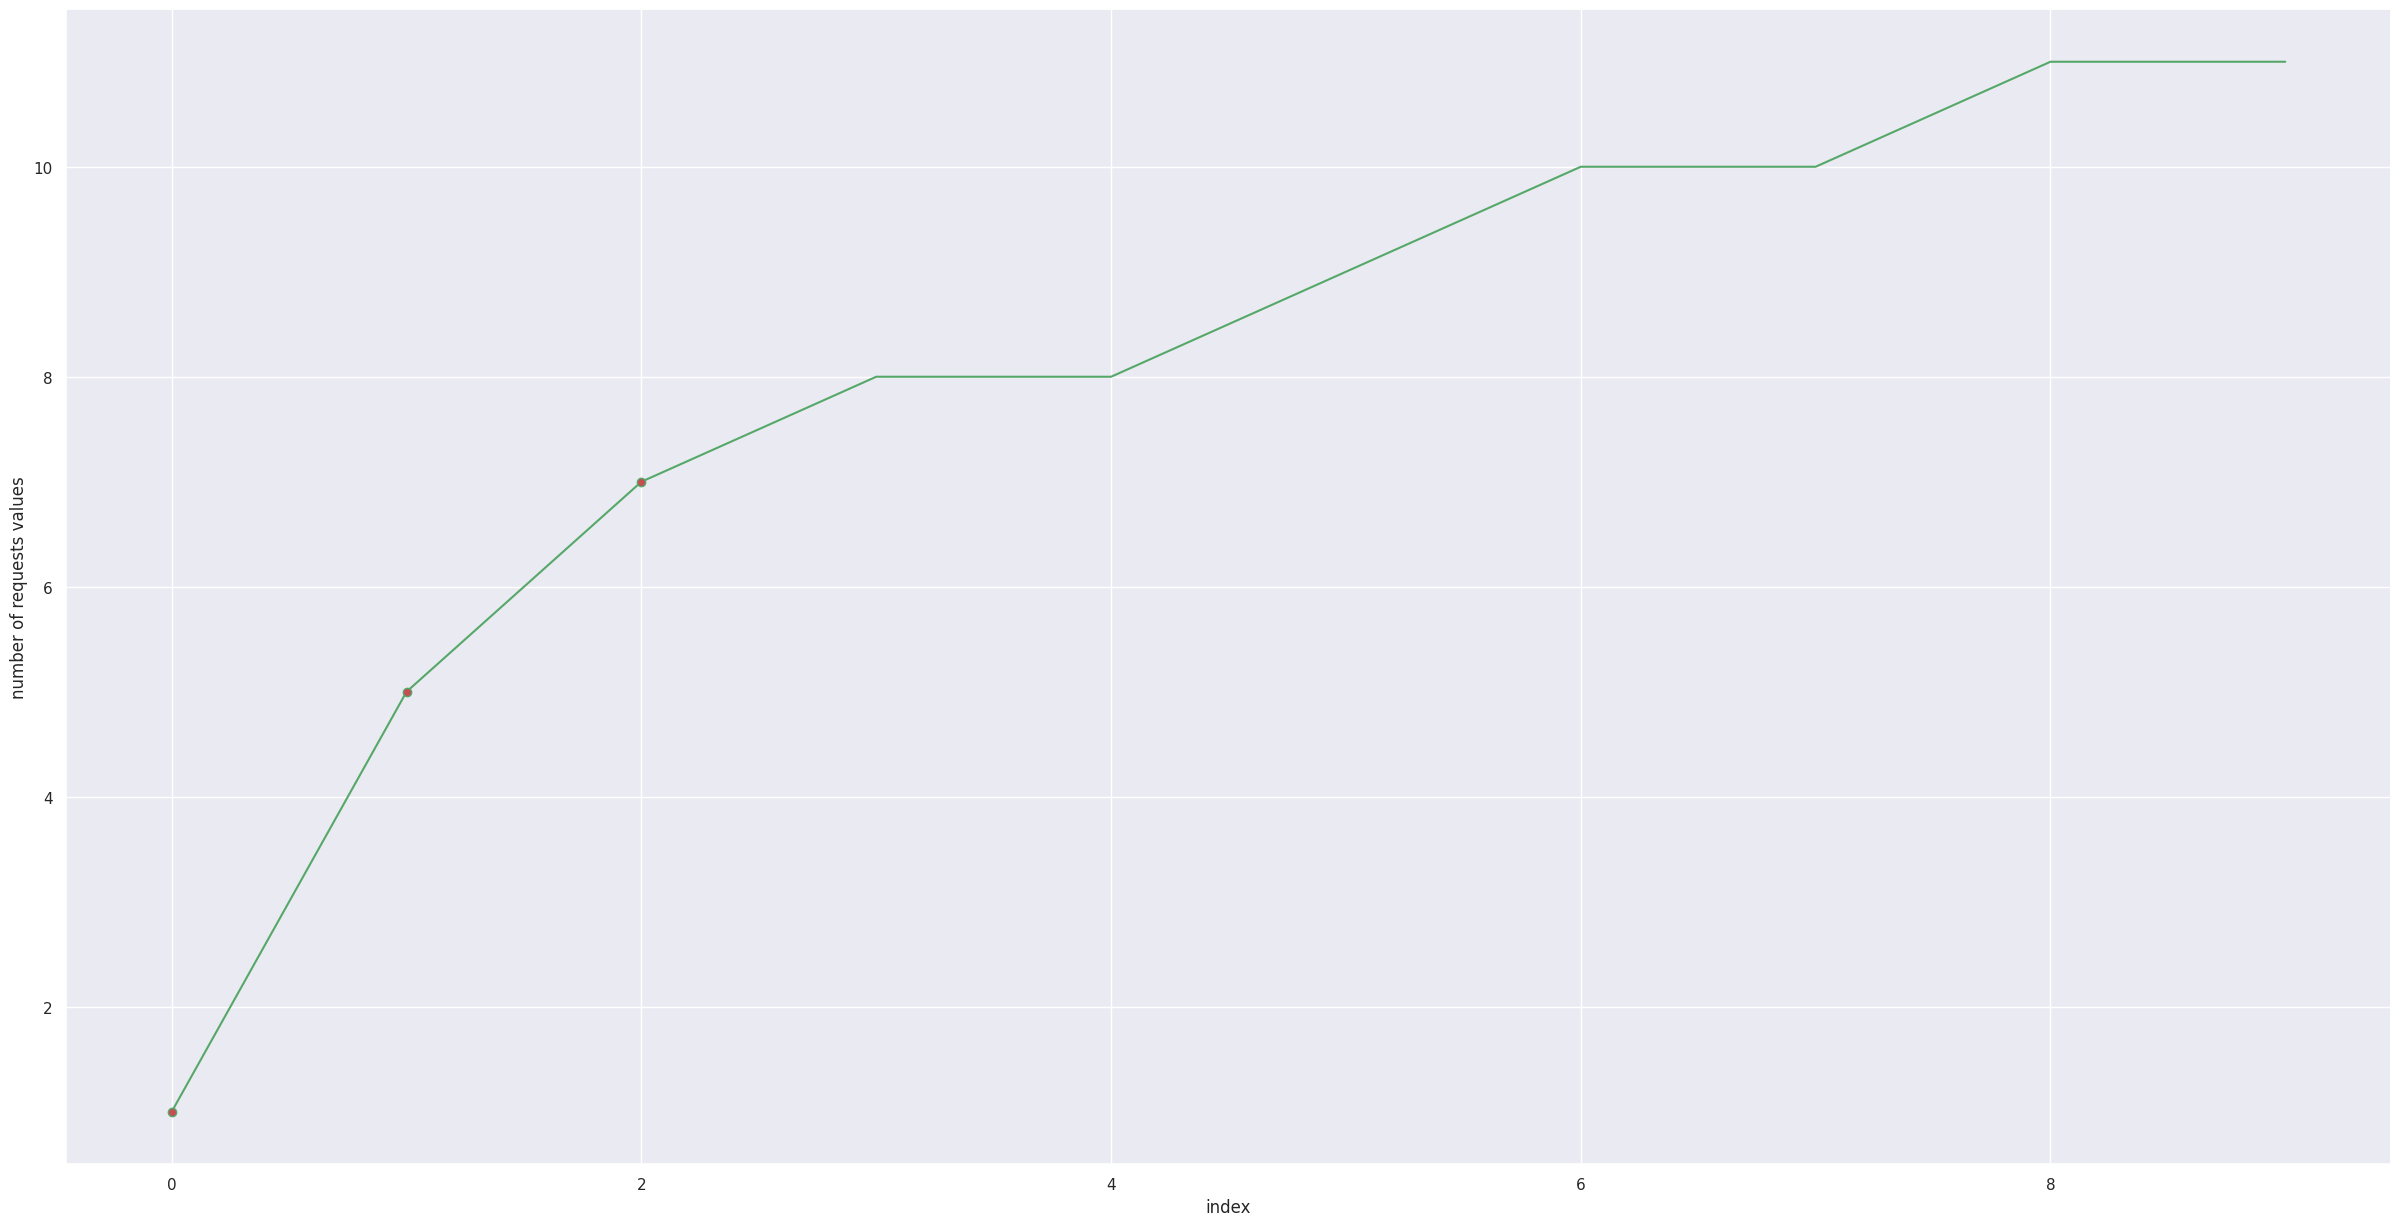

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(logs_df_statistical_method["number of requests"].iloc[:10].index, logs_df_statistical_method["number of requests"].iloc[:10], '-go', markevery=[0, 1, 2], markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('number of requests values')

Text(0, 0.5, 'received_bytes values')

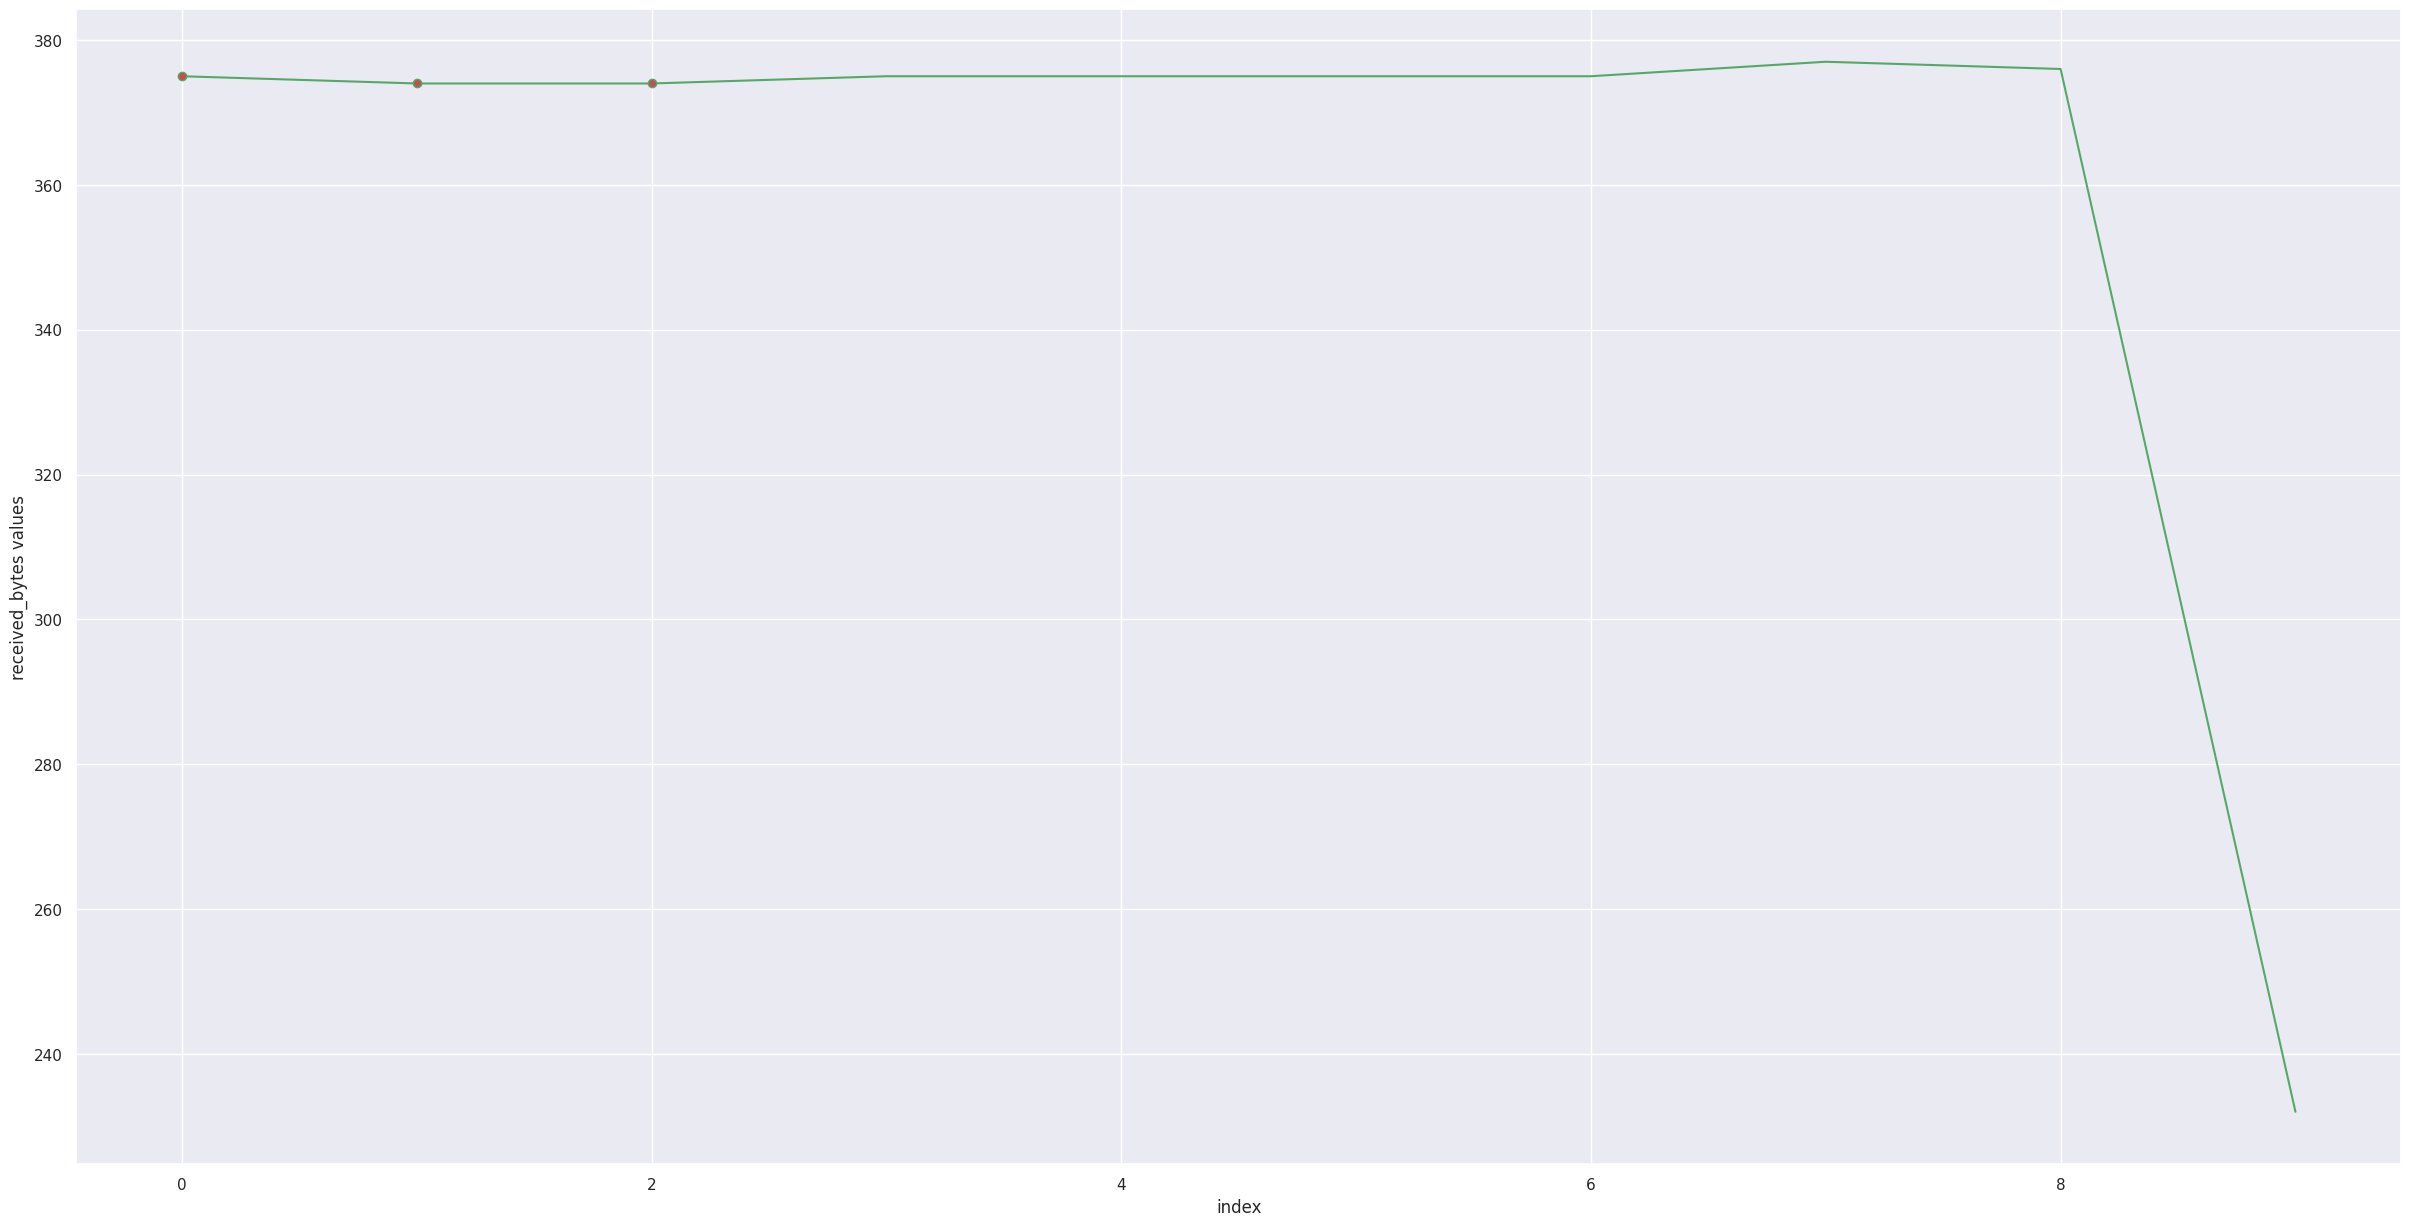

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(logs_df_statistical_method["received_bytes"].iloc[:10].index, logs_df_statistical_method["received_bytes"].iloc[:10], '-go', markevery=[0, 1, 2], markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('received_bytes values')

Text(0, 0.5, 'request_processing_time values')

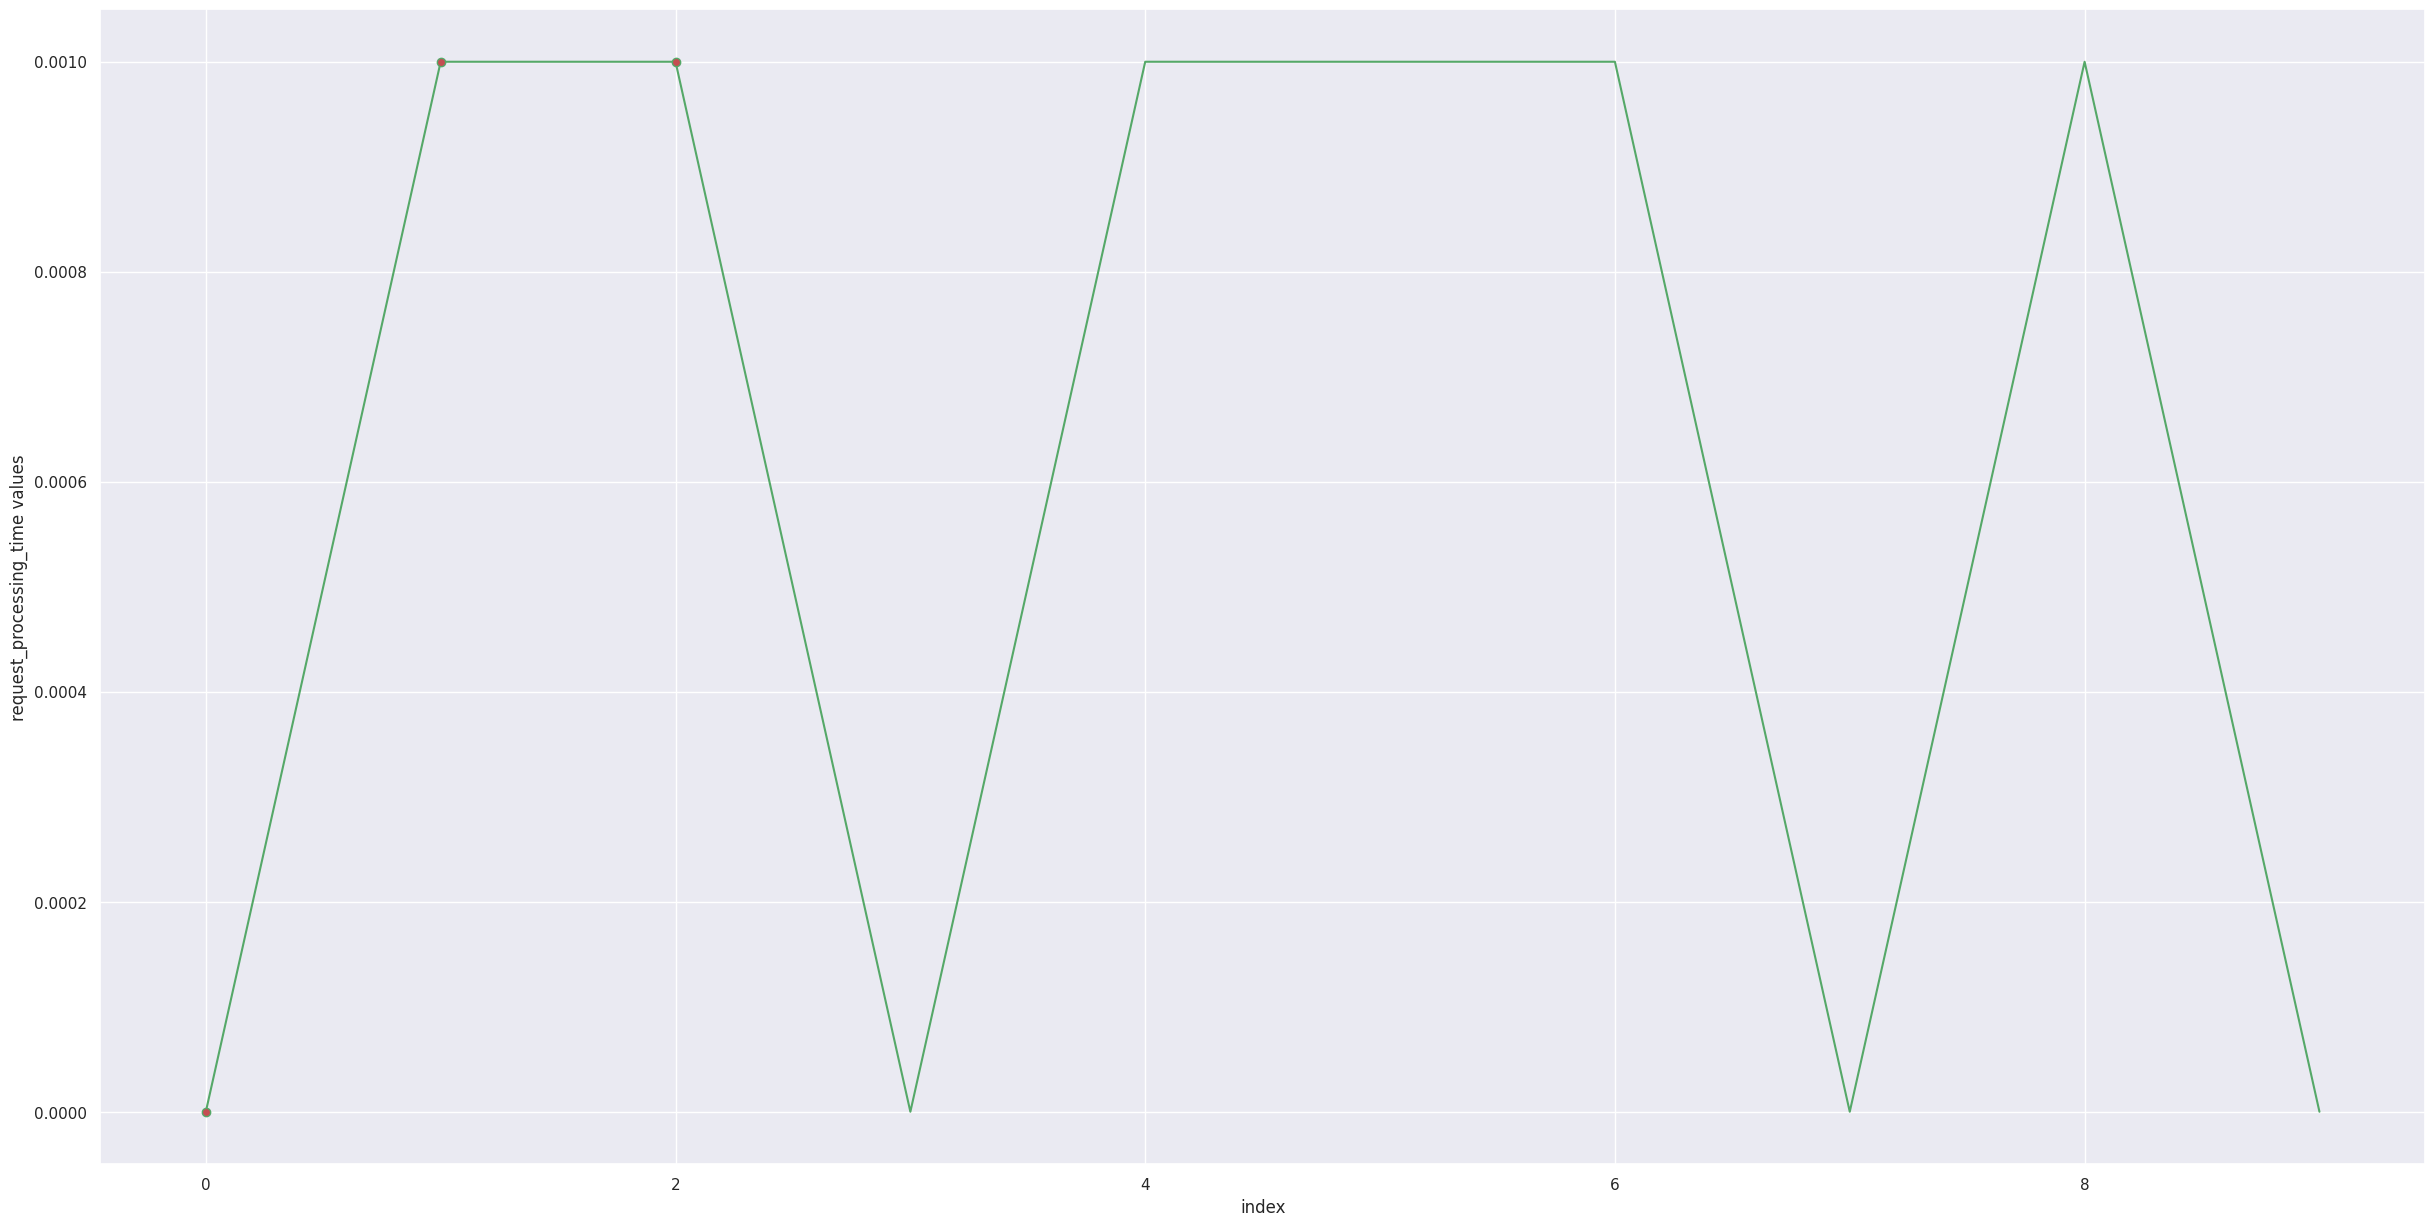

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(logs_df_statistical_method["request_processing_time"].iloc[:10].index, logs_df_statistical_method["request_processing_time"].iloc[:10], '-go', markevery=[0, 1, 2], markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('request_processing_time values')

Text(0, 0.5, 'request_processing_time values')

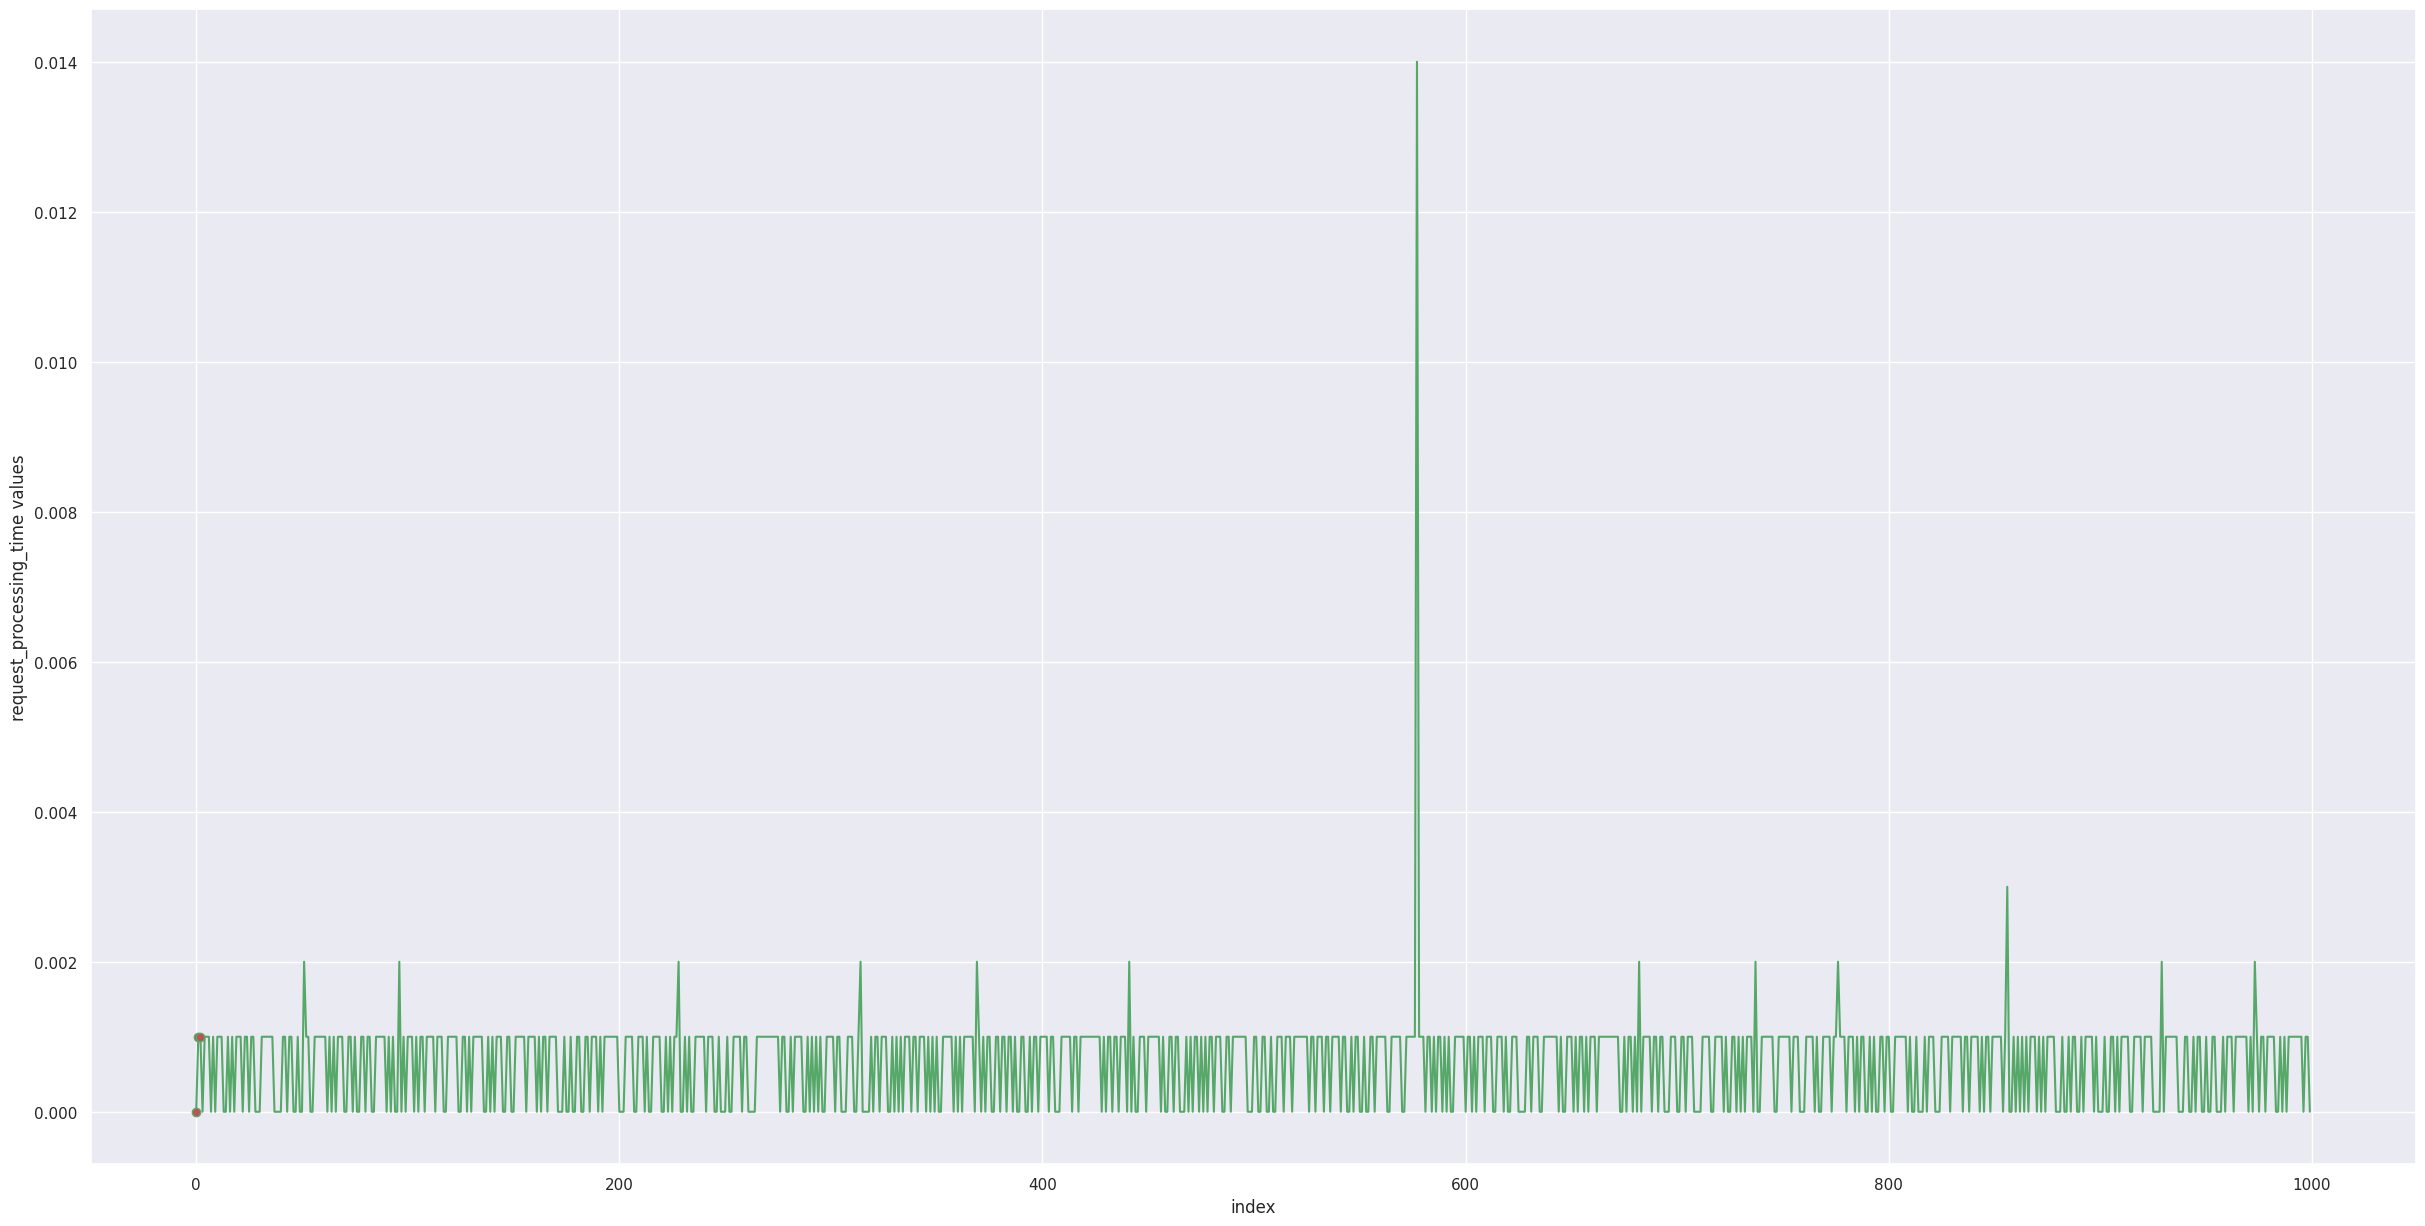

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(logs_df_statistical_method["request_processing_time"].iloc[:1000].index, logs_df_statistical_method["request_processing_time"].iloc[:1000], '-go', markevery=[0, 1, 2], markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('request_processing_time values')

Text(0, 0.5, 'response_processing_time values')

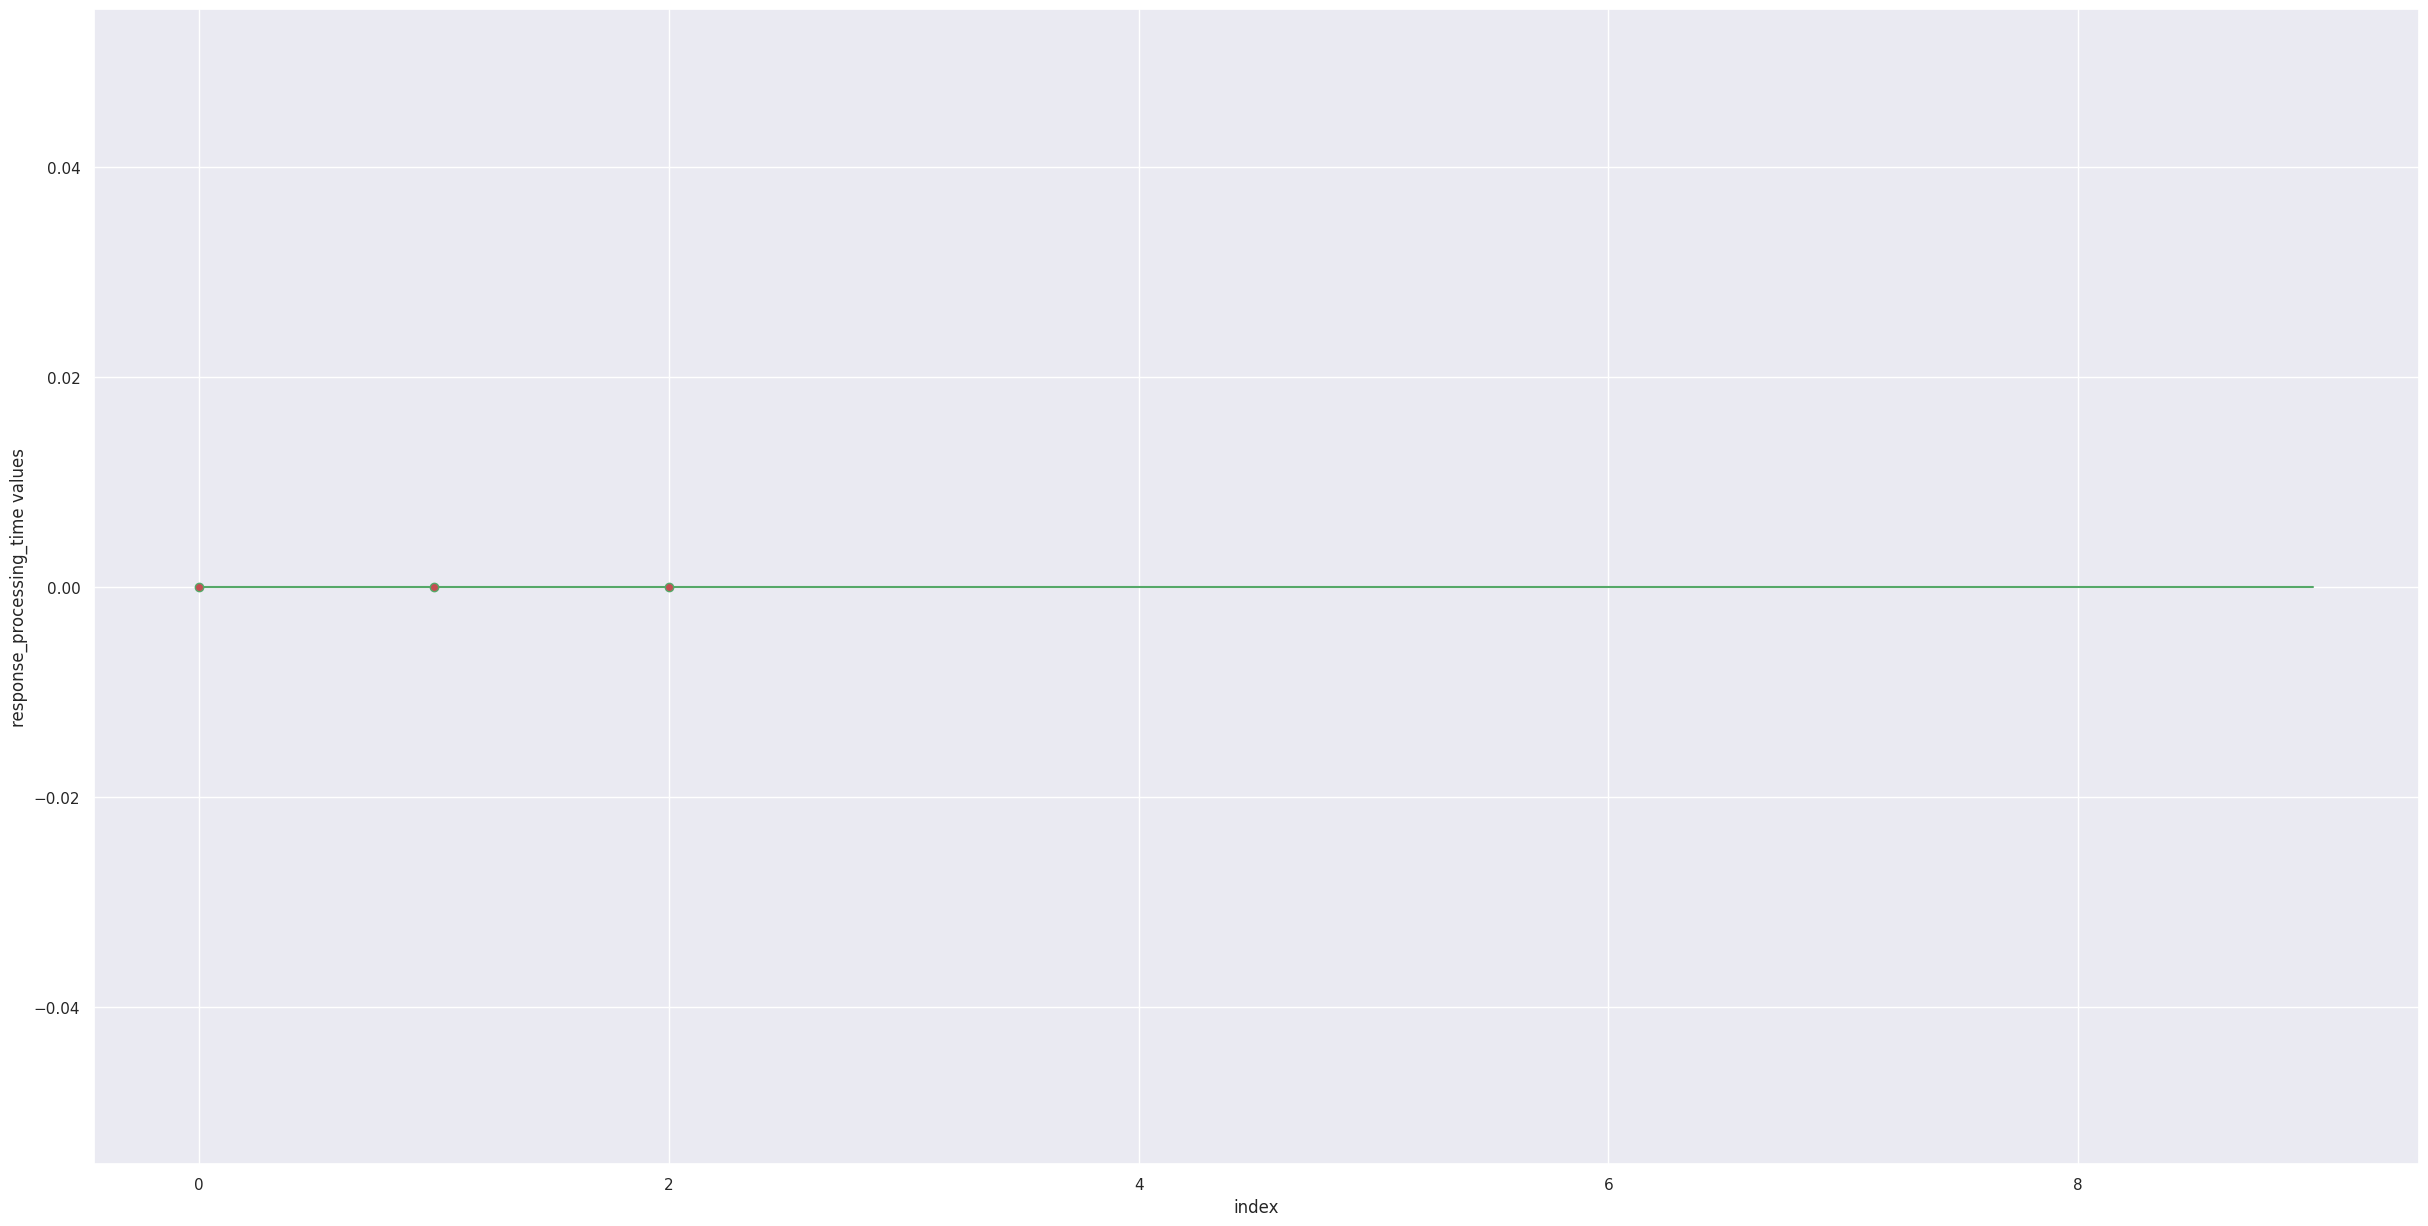

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(logs_df_statistical_method["response_processing_time"].iloc[:10].index, logs_df_statistical_method["response_processing_time"].iloc[:10], '-go', markevery=[0, 1, 2], markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('response_processing_time values')

Text(0, 0.5, 'sent_bytes values')

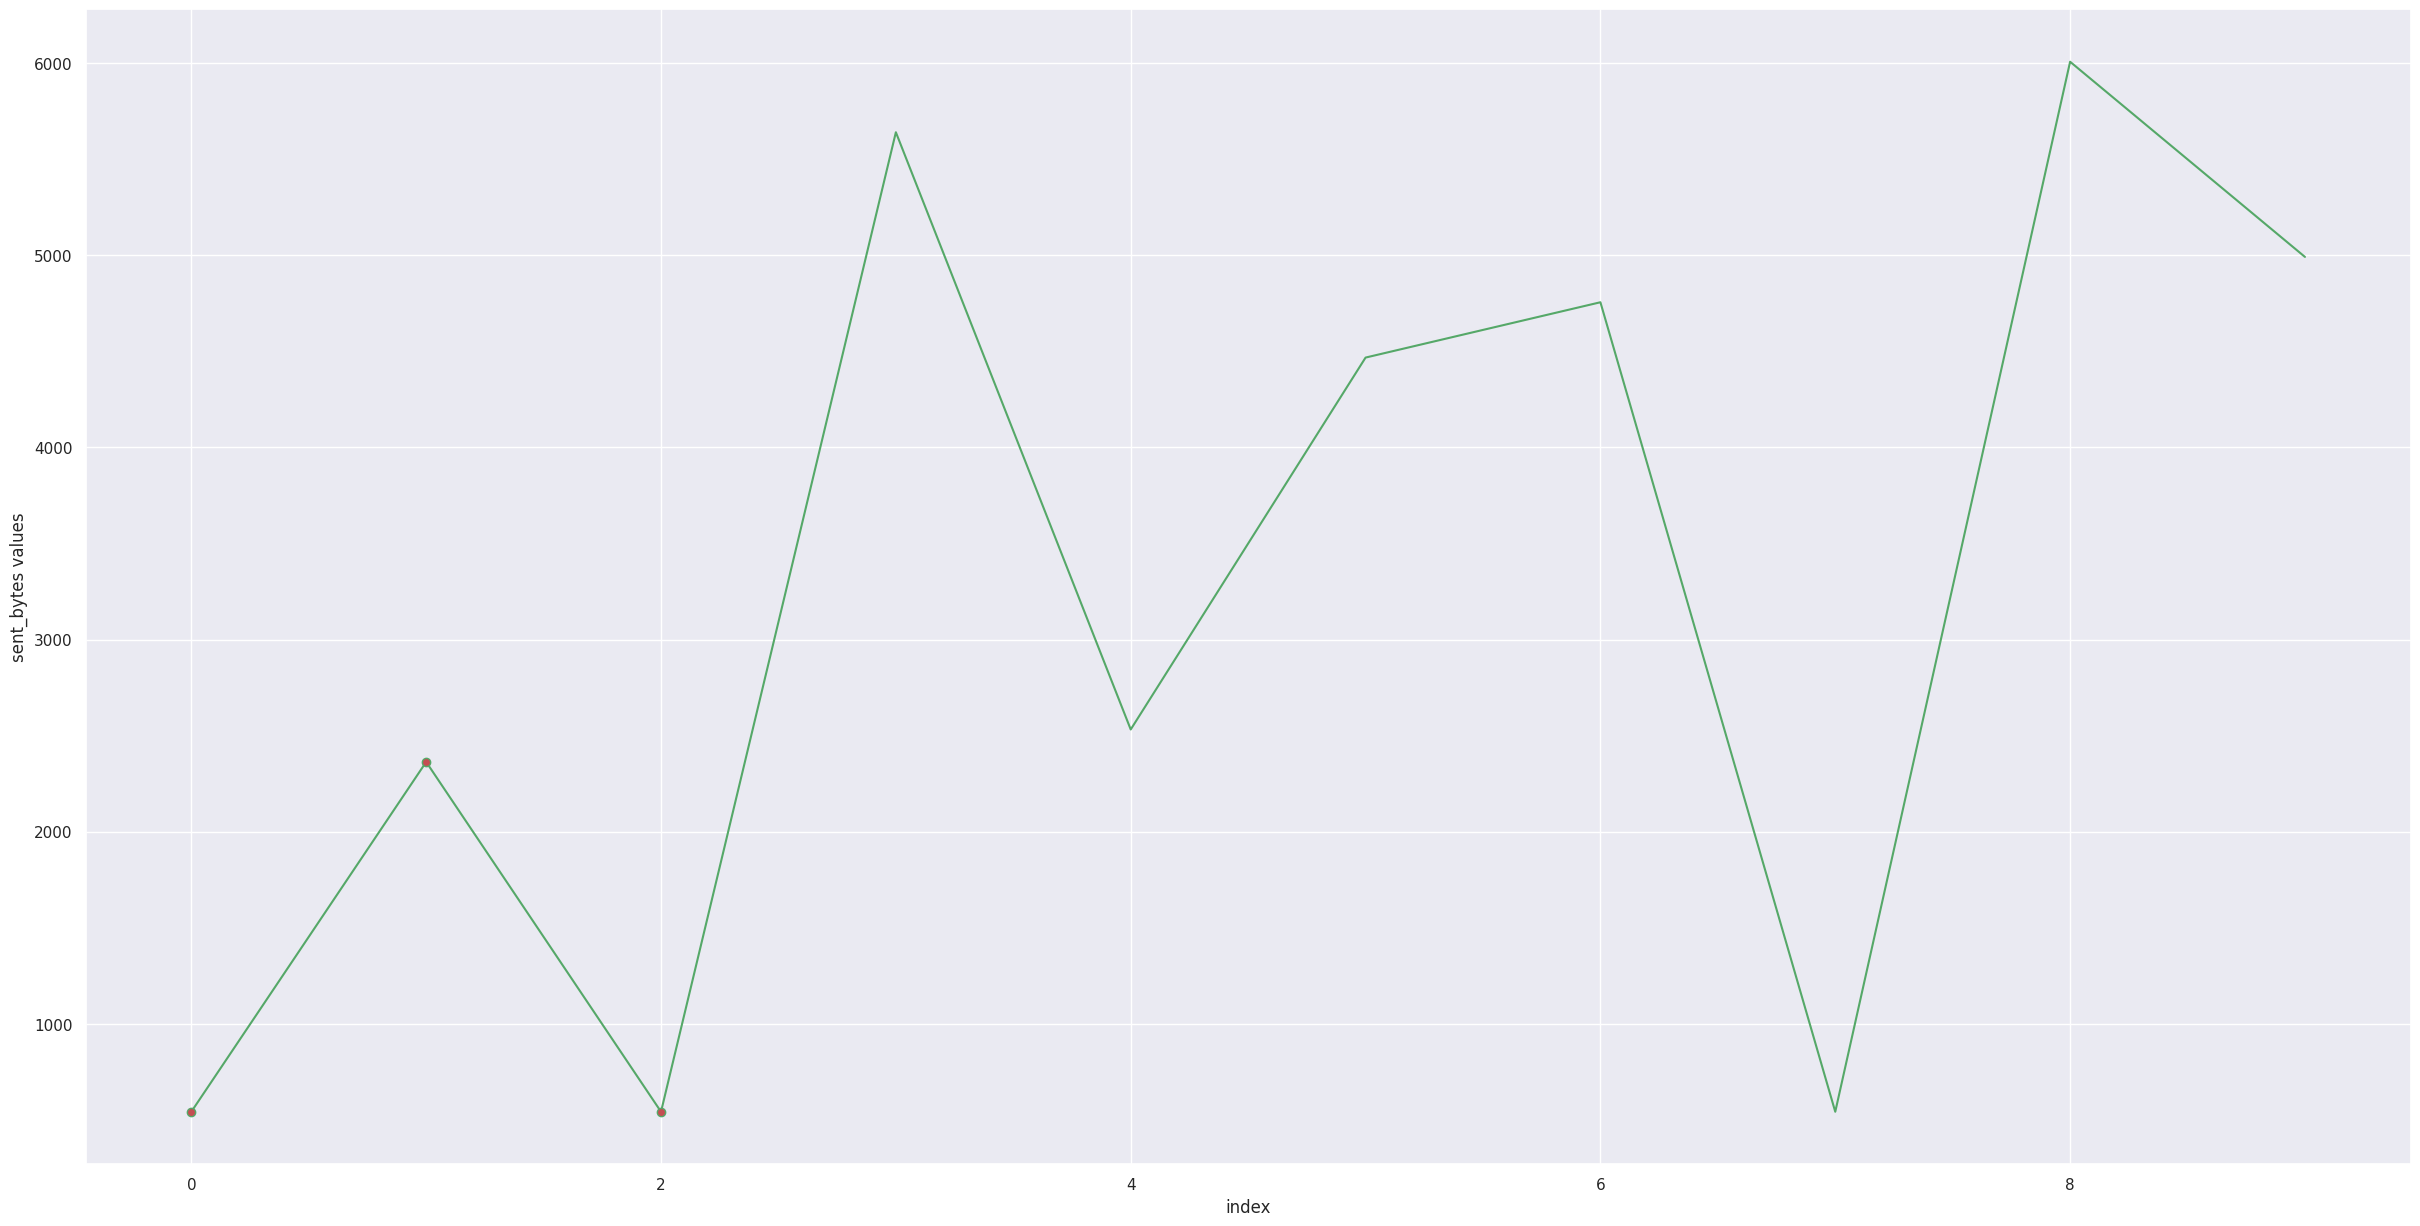

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(logs_df_statistical_method["sent_bytes"].iloc[:10].index, logs_df_statistical_method["sent_bytes"].iloc[:10], '-go', markevery=[0, 1, 2], markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('sent_bytes values')

Text(0, 0.5, 'sent_bytes values')

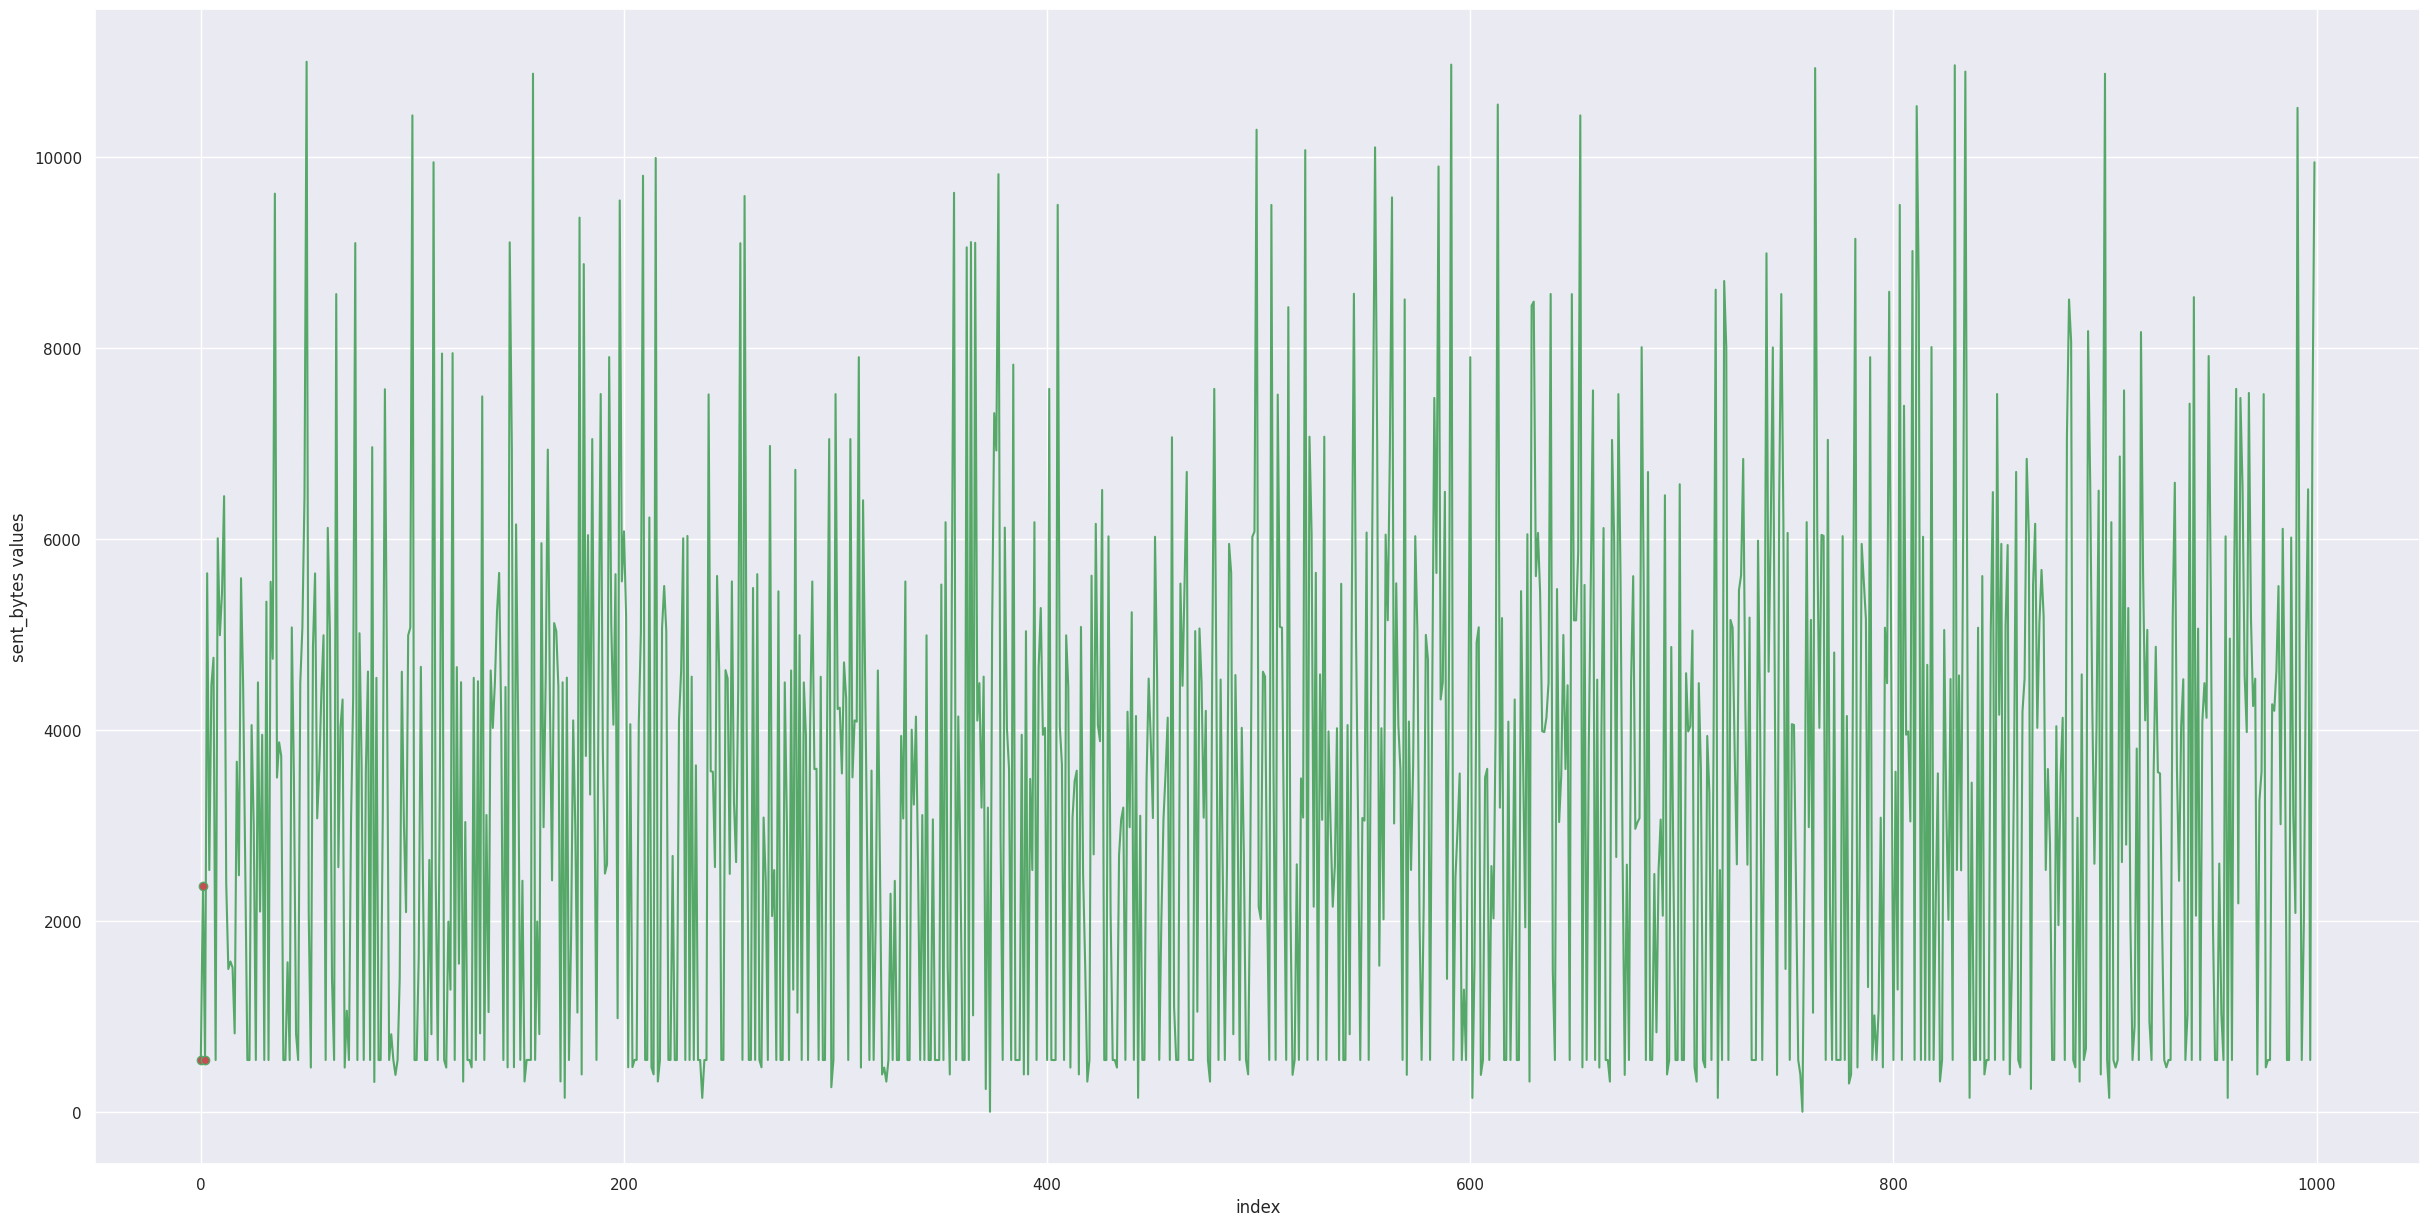

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(logs_df_statistical_method["sent_bytes"].iloc[:1000].index, logs_df_statistical_method["sent_bytes"].iloc[:1000], '-go', markevery=[0, 1, 2], markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('sent_bytes values')

Text(0, 0.5, 'target_processing_time values')

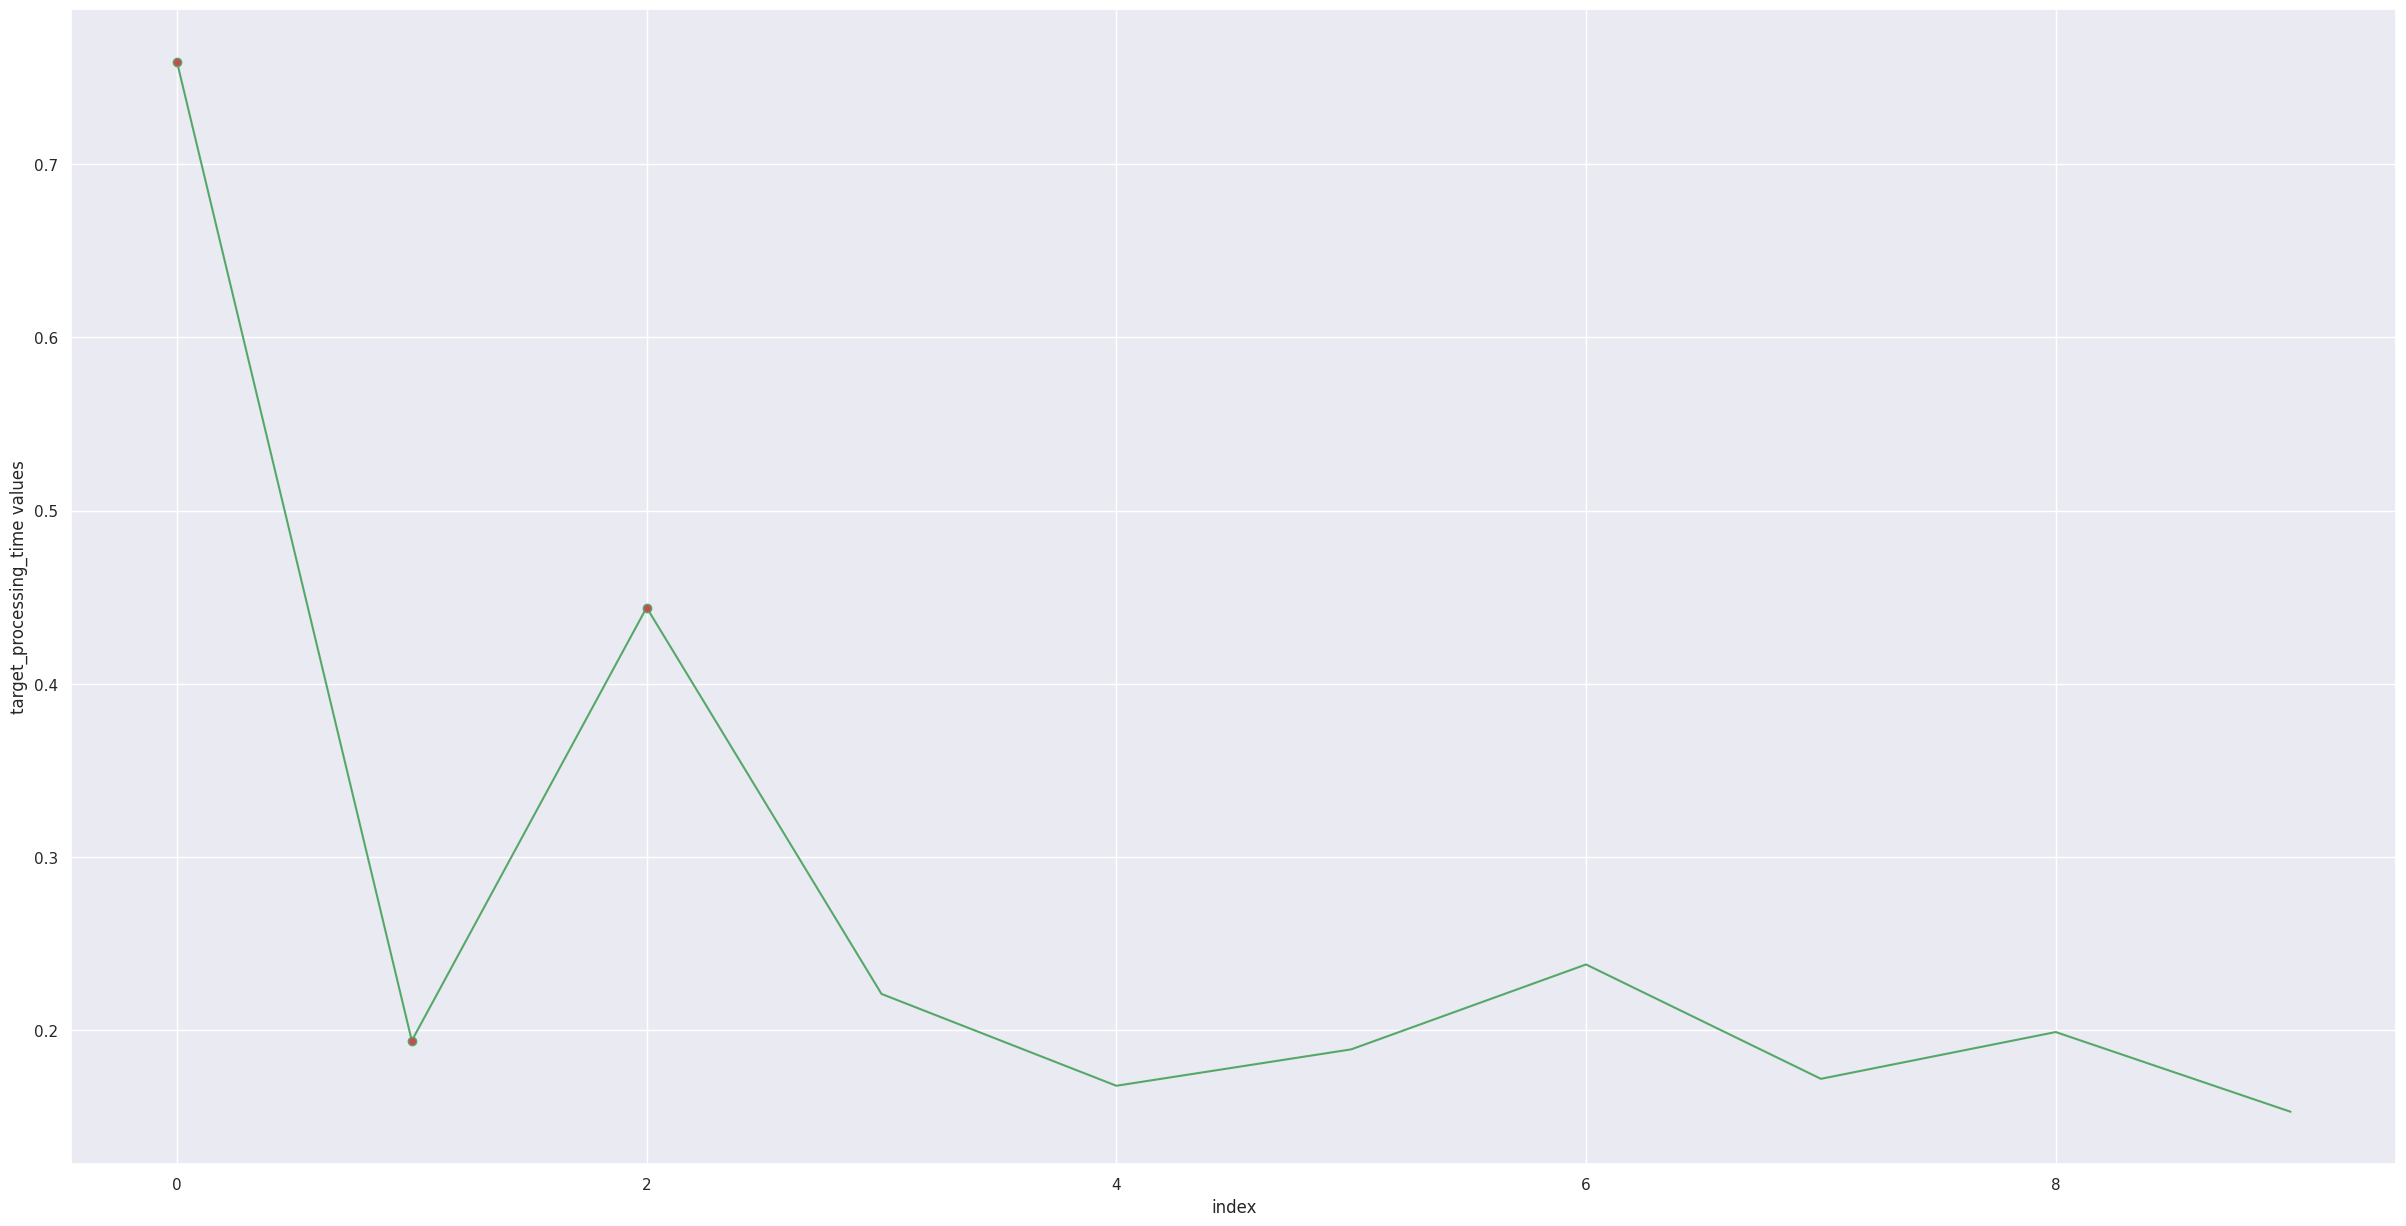

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(logs_df_statistical_method["target_processing_time"].iloc[:10].index, logs_df_statistical_method["target_processing_time"].iloc[:10], '-go', markevery=[0, 1, 2], markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('target_processing_time values')

Text(0, 0.5, 'target_processing_time values')

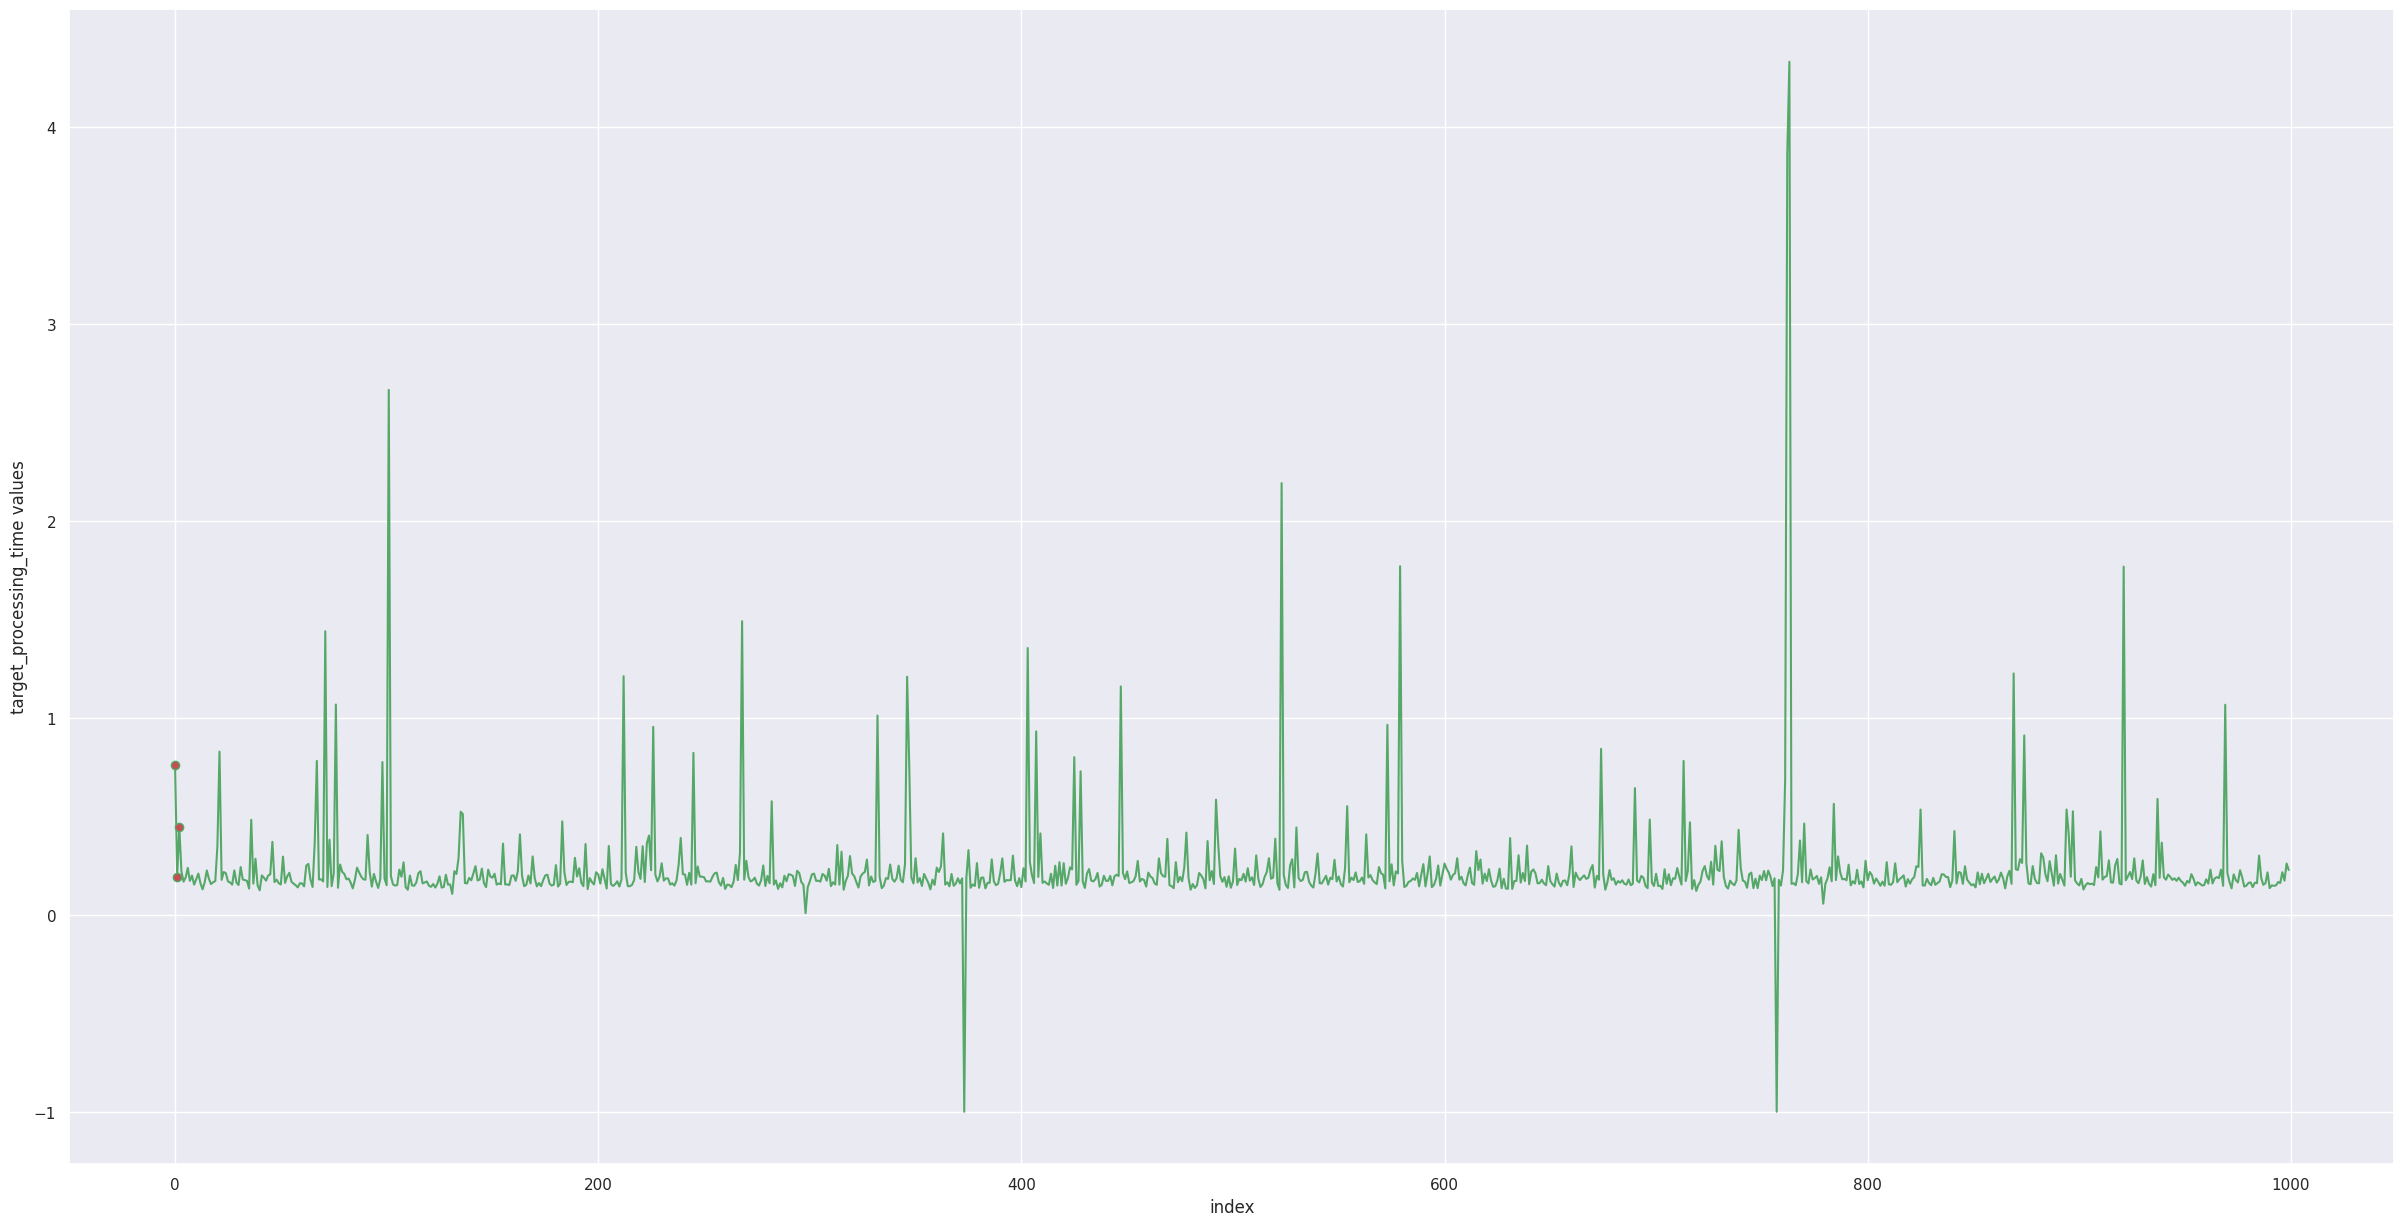

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(logs_df_statistical_method["target_processing_time"].iloc[:1000].index, logs_df_statistical_method["target_processing_time"].iloc[:1000], '-go', markevery=[0, 1, 2], markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('target_processing_time values')

# Probabilistic model

In [ ]:
import math

In [ ]:
# probabilistic model request_processing_time
# ARIMA(0, 0, 0) with constant 4 e-04
request_processing_time_anomalies = list(logs_df_statistical_method["request_processing_time"][abs(logs_df_statistical_method["request_processing_time"]) > 4 * pow(10, -4) + 2 * math.sqrt(2)].index)
len(request_processing_time_anomalies)

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(logs_df_statistical_method["request_processing_time"].diff().index, logs_df_statistical_method["request_processing_time"].diff())
plt.xlabel('index')
plt.ylabel('values')
plt.title('request_processing_time plot')

In [ ]:
# probabilistic model response_processing_time
# ARIMA(5, 1, 0)
ar_params = [-0.8352, -0.6647, -0.4993, -0.3295, -0.1647]
diff_variance = np.var(logs_df_statistical_method["response_processing_time"].diff()[1:])
ar_variance = np.sum(np.square(ar_params))
expected_variance = diff_variance * (1 + ar_variance)
response_processing_time_anomalies = list(logs_df_statistical_method["response_processing_time"].diff()[1:][abs(logs_df_statistical_method["response_processing_time"].diff()[1:]) > 2 * math.sqrt(expected_variance)].index)
len(request_processing_time_anomalies)

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(logs_df_statistical_method["response_processing_time"].diff().index, logs_df_statistical_method["response_processing_time"].diff())
plt.xlabel('index')
plt.ylabel('values')
plt.title('response_processing_time differenced plot')

In [ ]:
# probabilistic model target_processing_time
# ARIMA(1, 1, 0) with drift
ar_params = [-0.4890]
diff_variance = np.var(logs_df_statistical_method["target_processing_time"].diff()[1:])
ar_variance = np.sum(np.square(ar_params))
expected_variance = diff_variance * (1 + ar_variance)
target_processing_time_anomalies = list(logs_df_statistical_method["target_processing_time"].diff()[1:][abs(logs_df_statistical_method["target_processing_time"].diff()[1:]) > 2 * math.sqrt(expected_variance)].index)
len(target_processing_time_anomalies)

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(logs_df_statistical_method["target_processing_time"].diff().index, logs_df_statistical_method["target_processing_time"].diff(), '-go', markevery=target_processing_time_anomalies, markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('values')
plt.title('target_processing_time_anomalies anomalies plot')

In [ ]:
# probabilistic model received_bytes
# ARIMA(0, 1, 1)
received_bytes_anomalies = list((logs_df_statistical_method["received_bytes"].diff()[1:][abs(logs_df_statistical_method["received_bytes"].diff()[1:]) > 2 * math.sqrt(0.0099)]).index)
len(received_bytes_anomalies)

In [ ]:
sns.set()
plt.figure(figsize=(20,15))
plt.plot(logs_df_statistical_method["received_bytes"].diff().index, logs_df_statistical_method["received_bytes"].diff(), '-go', markevery=received_bytes_anomalies, markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('values')
plt.title('received_bytes anomalies plot')

In [ ]:
# probabilistic model sent_bytes
# ARIMA(5, 1, 0)
ar_params = [-0.8340, -0.6716, -0.5020, -0.3341 -0.1659]
diff_variance = np.var(logs_df_statistical_method["sent_bytes"].diff()[1:])
ar_variance = np.sum(np.square(ar_params))
expected_variance = diff_variance * (1 + ar_variance)
sent_bytes_anomalies = list(logs_df_statistical_method["sent_bytes"].diff()[1:][abs(logs_df_statistical_method["sent_bytes"].diff()[1:]) > 2 * math.sqrt(expected_variance)].index)
len(sent_bytes_anomalies)

In [ ]:
sns.set()
plt.figure(figsize=(15,10))
plt.plot(logs_df_statistical_method["sent_bytes"].diff().index, logs_df_statistical_method["sent_bytes"].diff(), '-go', markevery=sent_bytes_anomalies, markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('values')
plt.title('sent_bytes anomalies plot')

# Deep LSTM network

In [ ]:
import sklearn
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import Callback

In [ ]:
!pip install fastparquet

In [ ]:
from fastparquet import ParquetFile
ohe_logs_df = ParquetFile('/content/drive/MyDrive/ohe_logs_df.parq')
ohe_logs_df = ohe_logs_df.to_pandas()

In [ ]:
ohe_logs_df = ohe_logs_df.set_index("time")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def generate_datasets_for_training(data, window_size, scale=True, scaler_type=StandardScaler):
  _l = len(data)
  data = scaler_type().fit_transform(data)
  Xs = []
  for i in tqdm(range(0, (_l - window_size))):
    # because this is an autoencoder - our Ys are the same as our Xs. No need to pull the next sequence of values
    Xs.append(data[i:i+window_size])
  Xs = list(np.array(Xs).astype(np.float16))
  X_train, X_test, Y_train, Y_test = [np.array(x) for x in train_test_split(Xs, Xs)]
  return  (X_train.shape[2], X_train, Y_train, X_test, Y_test)

In [ ]:
epochs = 100
batch_size = 32
window_length = 1
from keras import metrics
import keras
import tensorflow as tf
import os

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=1e-2, patience=5, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False)

feats, X_train, Y_train, X_test, Y_test = generate_datasets_for_training(ohe_logs_df, window_length)

del ohe_logs_df # not needed here, only takes available RAM

model = keras.Sequential()
model.add(keras.layers.LSTM(64, kernel_initializer='he_uniform', batch_input_shape=(None, window_length, feats), return_sequences=True, name='encoder_1'))
model.add(keras.layers.LSTM(32, kernel_initializer='he_uniform', return_sequences=True, name='encoder_2'))
model.add(keras.layers.LSTM(16, kernel_initializer='he_uniform', return_sequences=False, name='encoder_3'))
# return_sequences=False as next layer is keras.layers.RepeatVector
model.add(keras.layers.RepeatVector(window_length, name='encoder_decoder_bridge'))
model.add(keras.layers.LSTM(16, kernel_initializer='he_uniform', return_sequences=True, name='decoder_1'))
model.add(keras.layers.LSTM(32, kernel_initializer='he_uniform', return_sequences=True, name='decoder_2'))
model.add(keras.layers.LSTM(64, kernel_initializer='he_uniform', return_sequences=True, name='decoder_3'))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(feats)))
model.compile(loss="mse", optimizer='adam')
model.build()
print(model.summary())

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='LSTM_best_val_mse_window_1.h5',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=False,
                             mode='min')

In [ ]:
history = model.fit(x=X_train, y=Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size, shuffle=True, callbacks=[early_stop, checkpoint]) # we can shuffle as windows have been defined

Early stopping criterion stopped training after 6th epoch

In [ ]:
best_model_LSTM = load_model('/content/LSTM_best_val_mse_window_1.h5')

In [ ]:
def print_val_mse(model):
    val_mse = model.evaluate(X_test, Y_test, verbose = 1)
    print('Mse on test data: {}'.format(val_mse))

In [ ]:
print_val_mse(best_model_LSTM)

In [ ]:
def plot_history(hist_baseline, epochs):

    fig = plt.figure(figsize = (15, 10))
    metric = "loss"
    plt.title(metric.capitalize())
    plt.xlabel("epochs")
    plt.ylabel(metric)
    plt.plot(range(1, 6 + 1), hist_baseline.history[metric], 'o-',
                 label="train", color = "tab:blue")
    plt.plot(range(1, 6 + 1), hist_baseline.history["val_" + metric], 'o-',
                 label="val", color = "tab:orange")
    plt.legend()

In [ ]:
plot_history(history, epochs)

## Evaluation

In [ ]:
from tensorflow.keras.models import load_model
best_model_LSTM = load_model('/content/LSTM_best_val_mse_window_1.h5')

In [ ]:
from tensorflow.keras.models import load_model
best_model_LSTM = load_model('/content/drive/MyDrive/LSTM_best_val_mse.h5')

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
'''X_train_mse = mean_squared_error(X_train, model.predict(X_train))
X_test_mse = mean_squared_error(X_test, model.predict(X_test))'''

In [ ]:
!pip install fastparquet

from fastparquet import ParquetFile
ohe_logs_df = ParquetFile('/content/drive/MyDrive/ohe_logs_df.parq')
ohe_logs_df = ohe_logs_df.to_pandas()

ohe_logs_df = ohe_logs_df.set_index("time")

window_size = 4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.6 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import StandardScaler

data = StandardScaler().fit_transform(ohe_logs_df)

Xs = list()
for i in tqdm(range(0, (len(data) - window_size))):
  Xs.append(data[i:i+window_size])

100%|██████████| 19996/19996 [00:00<00:00, 1468865.86it/s]


In [ ]:
mse_values = np.square((np.array(Xs).astype(np.float16) - best_model_LSTM.predict(np.array(Xs).astype(np.float16))))
mse_values = [np.sum(squared_diff_array)/12783 for squared_diff_array in mse_values]

625/625 [==============================] - 10s 6ms/step


In [ ]:
len(mse_values)

[Text(0.5, 0, 'residuals values'), Text(0, 0.5, 'count (number of values)')]

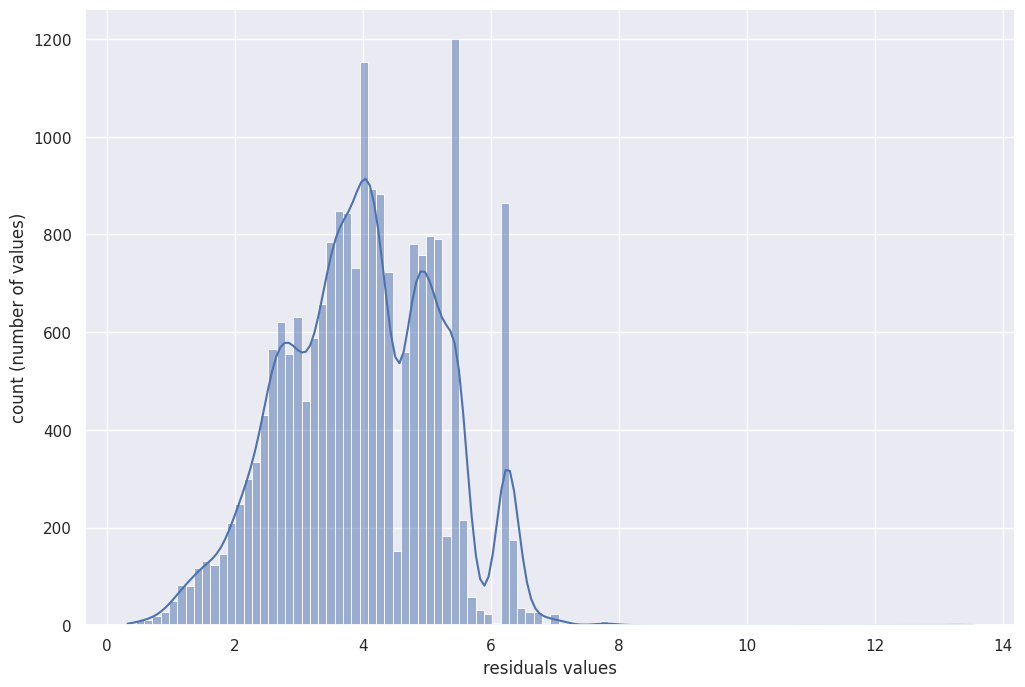

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 8)})
ax = sns.histplot(mse_values, kde=True)
ax.set(xlabel='residuals values', ylabel='count (number of values)')

In [ ]:
np.sum(np.array(mse_values) > 6)

In [ ]:
np.sum(np.array(mse_values) > 6) / (len(mse_values) - np.sum(np.array(mse_values) > 6))

Too much observations flagged as anomalies?

In [ ]:
np.sum(np.array(mse_values) > 7)

In [ ]:
threshold_satisfied = list()
for value_array in np.argwhere((np.array(mse_values) > 7) == True):
  threshold_satisfied.append(value_array[0])
threshold_satisfied

In [ ]:
# convert window indices to pandas indices
ohe_logs_def_indices = list()
for window_index in threshold_satisfied:
  ohe_logs_def_indices.append(window_index)
  ohe_logs_def_indices.append(window_index + 1)
  ohe_logs_def_indices.append(window_index + 2)
  ohe_logs_def_indices.append(window_index + 3)

In [ ]:
ohe_logs_def_indices[:5]

In [ ]:
np.sum(np.array(mse_values) > 8)

In [ ]:
ohe_logs_df.shape

## Interpreting results

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(ohe_logs_df["number of requests"].index, ohe_logs_df["number of requests"], '-go', markevery=ohe_logs_def_indices, markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('number of requests')

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(ohe_logs_df["received_bytes"].index, ohe_logs_df["received_bytes"], '-go', markevery=ohe_logs_def_indices, markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('received_bytes')

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(ohe_logs_df["request_processing_time"].index, ohe_logs_df["request_processing_time"], '-go', markevery=ohe_logs_def_indices, markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('request_processing_time')

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(ohe_logs_df["response_processing_time"].index, ohe_logs_df["response_processing_time"], '-go', markevery=ohe_logs_def_indices, markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('response_processing_time')

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(ohe_logs_df["sent_bytes"].index, ohe_logs_df["sent_bytes"], '-go', markevery=ohe_logs_def_indices, markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('sent_bytes')

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
plt.plot(ohe_logs_df["target_processing_time"].index, ohe_logs_df["target_processing_time"], '-go', markevery=ohe_logs_def_indices, markerfacecolor='r')
plt.xlabel('index')
plt.ylabel('target_processing_time')

By increasing the number used as the threshold less observations were marked as outliers and thus, we had more reason to believe these are anomalies.

In [ ]:
'''from sklearn.preprocessing import StandardScaler

data = StandardScaler().fit_transform(ohe_logs_df_100000)

del ohe_logs_df_100000 # not needed anymore at this stage

Xs = list()
for i in tqdm(range(0, (len(data) - window_size))):
  Xs.append(data[i:i+window_size])'''

In [ ]:
'''import pickle

f = open('Xs.pckl', 'wb')
pickle.dump(np.array(Xs).asarray(np.float16), f)
f.close()'''

In [ ]:
'''import joblib

joblib.dump(np.array(Xs).asarray(np.float16), '/content/drive/MyDrive/Xs')'''

In [ ]:
'''from fastparquet import write
write('Xs.parq', pd.DataFrame(Xs), compression="GZIP")'''

We cannot evaluate deep LSTM neural network on all 100000 observations as we do not have enough available RAM for that. Therefore, we will examine outputs of nn for X_train and X_test.

In [ ]:
'''# this will be done after the runtime is restarted as we need maximum available RAM
mse_values = np.square(np.array(Xs).asarray(np.float16) - model.predict(np.array(Xs).asarray(np.float16)))'''